# Import

In [1]:
%pip install langdetect
%pip install demoji
%pip install tabulate
%pip install google_trans_new
%pip install contractions
%pip install googletrans==4.0.0-rc1
%pip install spacy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
#import 
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import string
import re
import demoji
import contractions
import plotly.graph_objects as go
import plotly.express as px
import spacy

nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')
demoji.download_codes() 
nltk.download('opinion_lexicon')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import tokenize
from collections import Counter,defaultdict
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords,opinion_lexicon
from langdetect import detect
from nltk.util import ngrams
from tabulate import tabulate
from textblob import TextBlob
from googletrans import Translator
from wordcloud import WordCloud
from nltk.stem import PorterStemmer, LancasterStemmer
from nltk.stem import WordNetLemmatizer


/Users/huiyee/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/huiyee/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /Users/huiyee/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/huiyee/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/var/folders/9r/9qt500210812pjzmxb2cf3sm0000gn/T/ipykernel_65112/2661616118.py:18: FutureWarning: The demoji.download_codes attribute is deprecated and will be removed from demoji in a future version. It is an unused attribute as emoji codes are now distributed directly with the demoji package.
  demoji.download_codes()
[nltk_data] Downloading package opinion_le

# Data Understanding - Detect

In [3]:
#import dataset
filepath = "/Users/huiyee/Downloads/Study/Year3Sem1/FYP/SuicideAndDepression_Detection.csv"
df = pd.read_csv(filepath)
df.head()

text         class
0  Does life actually work for most / non-depress...    depression
1  I found my friend's bodyIt was almost nine yea...    depression
2  Ex Wife Threatening SuicideRecently I left my ...  SuicideWatch
3  Am I weird I don't get affected by compliments...     teenagers
4  Finally 2020 is almost over... So I can never ...     teenagers

In [4]:
#Detect unique value of class
unique_class = df['class'].unique()

# Prepare the data for the table
table_data = [(i+1, text) for i, text in enumerate(unique_class)]
headers = ["No", "Unique Class"]
# Generate the table
table = tabulate(table_data, headers=headers, tablefmt="grid")

# Display the table
print(table)

+------+----------------+
|   No | Unique Class   |
+======+================+
|    1 | depression     |
+------+----------------+
|    2 | SuicideWatch   |
+------+----------------+
|    3 | teenagers      |
+------+----------------+
|    4 | nan            |
+------+----------------+


In [5]:
#Drop the Suicide Watch
df.drop(df[df['class'] == "SuicideWatch"].index, inplace=True)

In [6]:
df.head()

text       class
0  Does life actually work for most / non-depress...  depression
1  I found my friend's bodyIt was almost nine yea...  depression
3  Am I weird I don't get affected by compliments...   teenagers
4  Finally 2020 is almost over... So I can never ...   teenagers
5  Reddit, I've never opened up to anyone with my...  depression

In [10]:
# Drop rows with null values in the 'text' column
df.dropna(subset=['text'], inplace=True)
# Reset index after dropping rows
df.reset_index(drop=True, inplace=True)
#check null values
df.isnull().sum()


text      0
class    14
dtype: int64

In [7]:
#check null values
df.isnull().sum()

text      1
class    14
dtype: int64

In [8]:
#show data information
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 232087 entries, 0 to 348123
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    232086 non-null  object
 1   class   232073 non-null  object
dtypes: object(2)
memory usage: 5.3+ MB


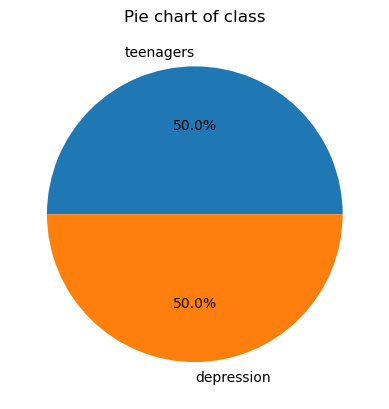

In [9]:
#value counts on Class column
valuecount = df['class'].value_counts()
plt.pie(valuecount,labels=valuecount.index,autopct="%1.1f%%")
plt.title("Pie chart of class")
plt.show()

In [11]:
# Perform sentiment prediction for the reviews stored in a CSV file ~~~~~~~~~~~ 
sia = SentimentIntensityAnalyzer()
text_sentiment = df['text']
sentiment_labels = []
for line in text_sentiment:
        sent = sia.polarity_scores(line)
        if (sent['compound'] == 0):
            sentiment_labels.append("Neutral")
        else:
            if (sent['compound'] > 0):
                sentiment_labels.append("Positive")
            else:
                sentiment_labels.append("Negative")
df['sentiment_label'] = sentiment_labels
df.head()

text       class  \
0  Does life actually work for most / non-depress...  depression   
1  I found my friend's bodyIt was almost nine yea...  depression   
2  Am I weird I don't get affected by compliments...   teenagers   
3  Finally 2020 is almost over... So I can never ...   teenagers   
4  Reddit, I've never opened up to anyone with my...  depression   

  sentiment_label  
0        Positive  
1        Negative  
2        Positive  
3        Negative  
4        Negative

In [12]:
#Sentiment Label Count
depression_df = df[df['class']=="depression"]
value_sentiment_label = depression_df['sentiment_label'].value_counts()
print(value_sentiment_label)

sentiment_label
Negative    74118
Positive    40870
Neutral      1047
Name: count, dtype: int64


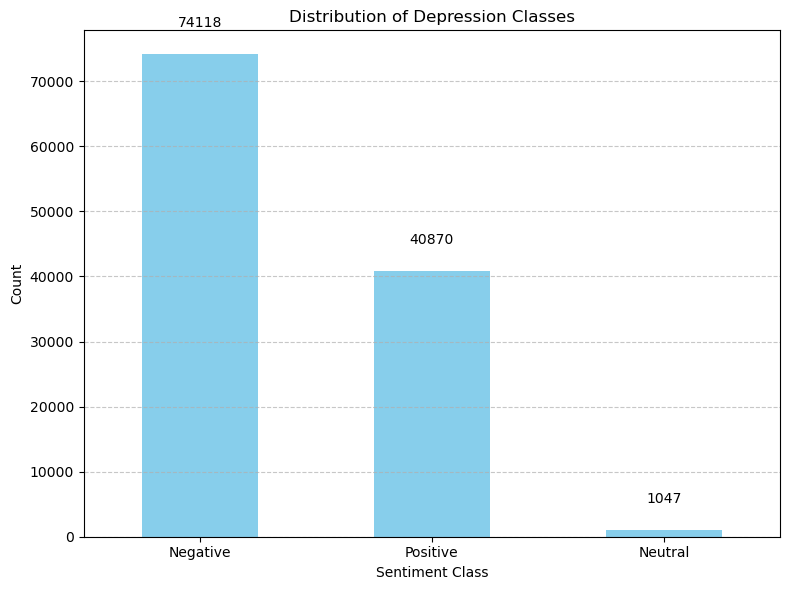

In [13]:
#Display Sentiment using Bar Chart 
class_count = depression_df['sentiment_label'].value_counts()

# Create a bar chart to visualize the distribution of classes
plt.figure(figsize=(8, 6))
bars = class_count.plot(kind='bar', color='skyblue')
plt.title('Distribution of Depression Classes')
plt.xlabel('Sentiment Class')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Set rotation angle to 0 for horizontal labels
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for better visualization
# Add data labels to the bars
for bar, count in zip(bars.patches, class_count.values):
    plt.text(bar.get_x() + bar.get_width() / 2, 
             bar.get_height() + 0.05 * max(class_count),  # Adjust the position above the bar
             f'{count}',  # Display the count value
             ha='center', va='bottom', color='black')  # Horizontal alignment and vertical alignment

plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [14]:
#Sentiment Label Percentage Using Funnel Chart
percentage_sentiment_label = (value_sentiment_label / len(df['sentiment_label'])) * 100
# Sort the percentages in descending order
percentage_sentiment_label_sorted = percentage_sentiment_label.sort_values(ascending=False)

# Define the labels and percentages
labels = percentage_sentiment_label_sorted.index
percentages = percentage_sentiment_label_sorted.values

# Create a funnel chart
fig = go.Figure(go.Funnel(
    y=labels,
    x=percentages,
    textinfo="percent total",
    marker=dict(color=["lightblue", "lightgreen", "lightcoral"])  # Define colors
))

# Update layout
fig.update_layout(
    title="Funnel chart of Sentiment Label for Depression Classes",
    xaxis_title="Percentage",
    yaxis_title="Sentiment Label"
)

fig.show()

In [15]:
#Length of 'Text'
#add length column to the data frame
df['length']=df['text'].str.len()
df.head()

text       class  \
0  Does life actually work for most / non-depress...  depression   
1  I found my friend's bodyIt was almost nine yea...  depression   
2  Am I weird I don't get affected by compliments...   teenagers   
3  Finally 2020 is almost over... So I can never ...   teenagers   
4  Reddit, I've never opened up to anyone with my...  depression   

  sentiment_label  length  
0        Positive     254  
1        Negative    3009  
2        Positive     138  
3        Negative     129  
4        Negative    2177

In [16]:
#Number of Words - Text 
def word_count(text):
    text_list = text.split()
    return len(text_list)

df['Word_count'] = df['text'].apply(word_count)
df.head()

text       class  \
0  Does life actually work for most / non-depress...  depression   
1  I found my friend's bodyIt was almost nine yea...  depression   
2  Am I weird I don't get affected by compliments...   teenagers   
3  Finally 2020 is almost over... So I can never ...   teenagers   
4  Reddit, I've never opened up to anyone with my...  depression   

  sentiment_label  length  Word_count  
0        Positive     254          44  
1        Negative    3009         592  
2        Positive     138          27  
3        Negative     129          26  
4        Negative    2177         414

In [17]:
#Average length of text
df['Mean_text_length'] = df['text'].map(lambda text:np.mean([len(text)
                        for text in text.split()]))
df.head()

text       class  \
0  Does life actually work for most / non-depress...  depression   
1  I found my friend's bodyIt was almost nine yea...  depression   
2  Am I weird I don't get affected by compliments...   teenagers   
3  Finally 2020 is almost over... So I can never ...   teenagers   
4  Reddit, I've never opened up to anyone with my...  depression   

  sentiment_label  length  Word_count  Mean_text_length  
0        Positive     254          44          4.795455  
1        Negative    3009         592          4.070946  
2        Positive     138          27          4.148148  
3        Negative     129          26          4.000000  
4        Negative    2177         414          4.241546

In [18]:
#Average length of sentences
df['Mean_sen_length'] = df['text'].map(lambda text:np.mean([len(sent) for
                        sent in tokenize.sent_tokenize(text)]))
df.head()

text       class  \
0  Does life actually work for most / non-depress...  depression   
1  I found my friend's bodyIt was almost nine yea...  depression   
2  Am I weird I don't get affected by compliments...   teenagers   
3  Finally 2020 is almost over... So I can never ...   teenagers   
4  Reddit, I've never opened up to anyone with my...  depression   

  sentiment_label  length  Word_count  Mean_text_length  Mean_sen_length  
0        Positive     254          44          4.795455        50.000000  
1        Negative    3009         592          4.070946        68.813953  
2        Positive     138          27          4.148148       138.000000  
3        Negative     129          26          4.000000        42.333333  
4        Negative    2177         414          4.241546       134.750000

length 8 40106


/Users/huiyee/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/Users/huiyee/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



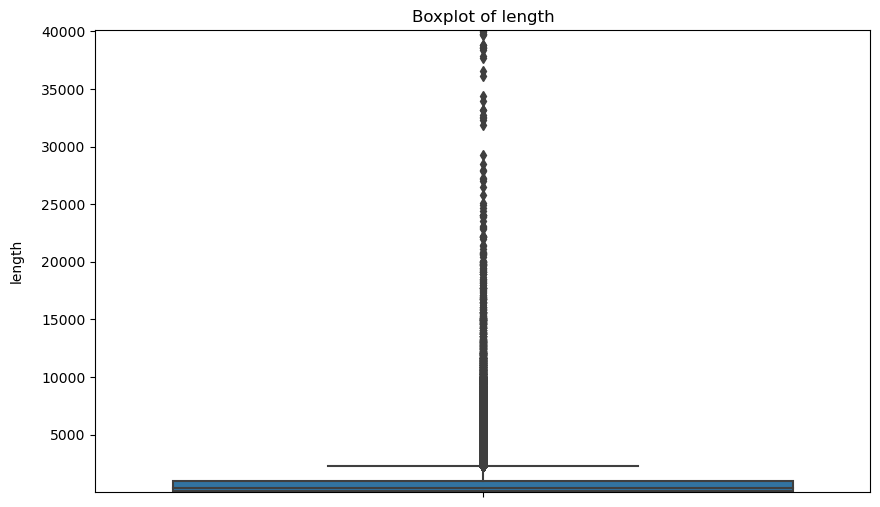

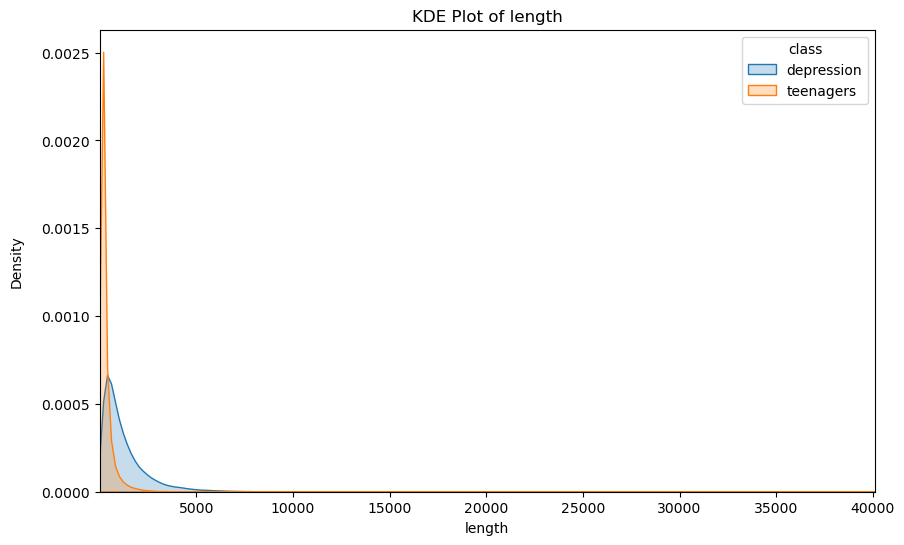

Word_count 1 8220


/Users/huiyee/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/Users/huiyee/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



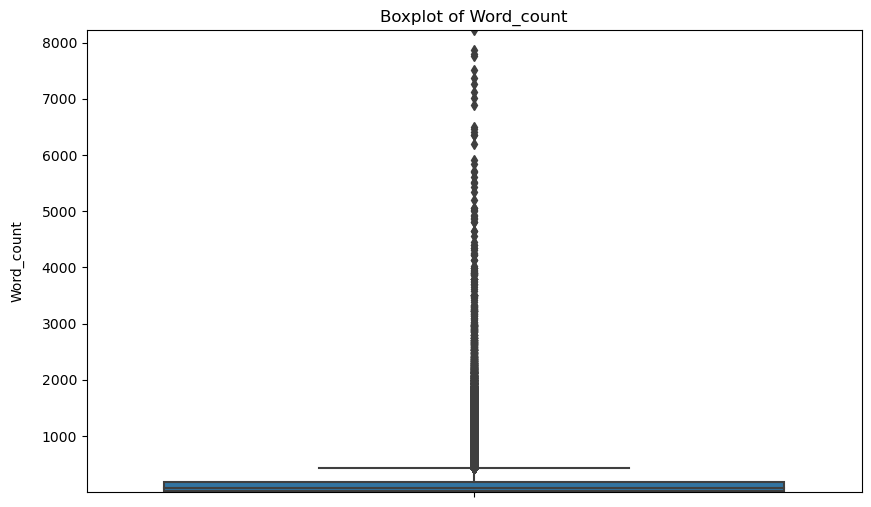

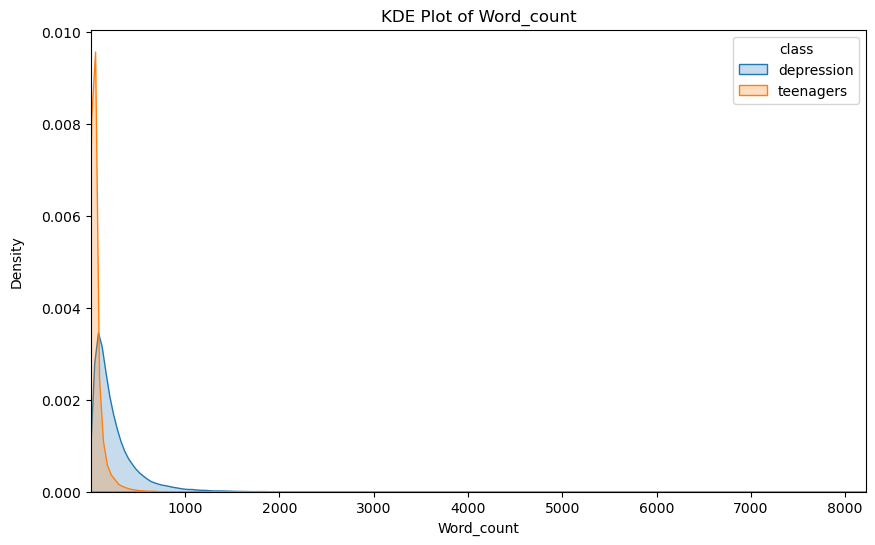

Mean_text_length 1.0 6872.0


/Users/huiyee/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/Users/huiyee/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



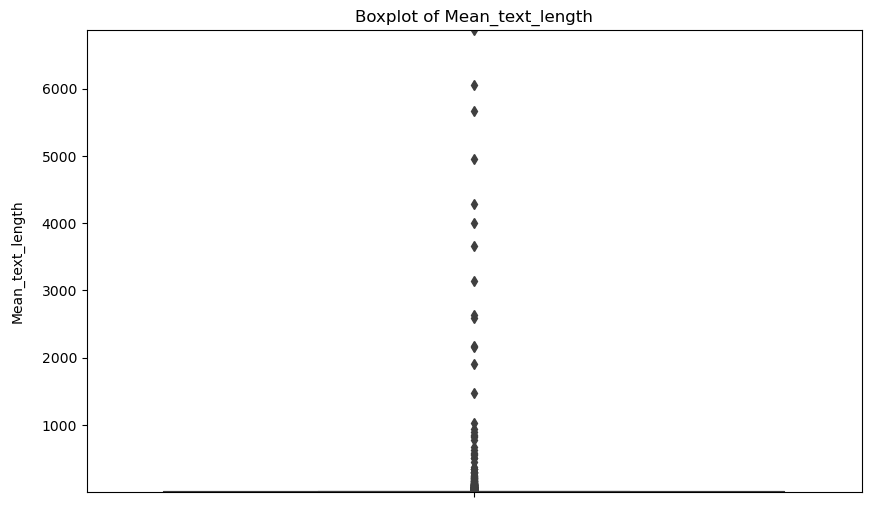

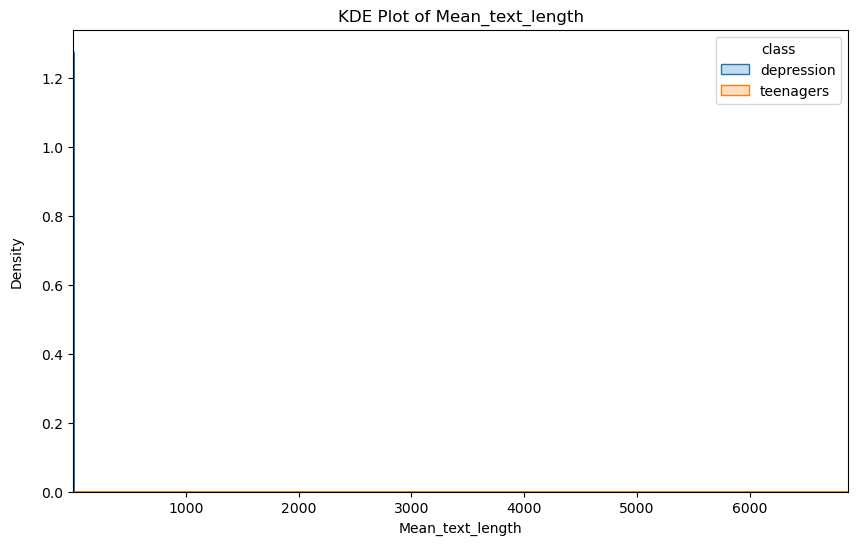

Mean_sen_length 3.042636131075649 40017.0


/Users/huiyee/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/Users/huiyee/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



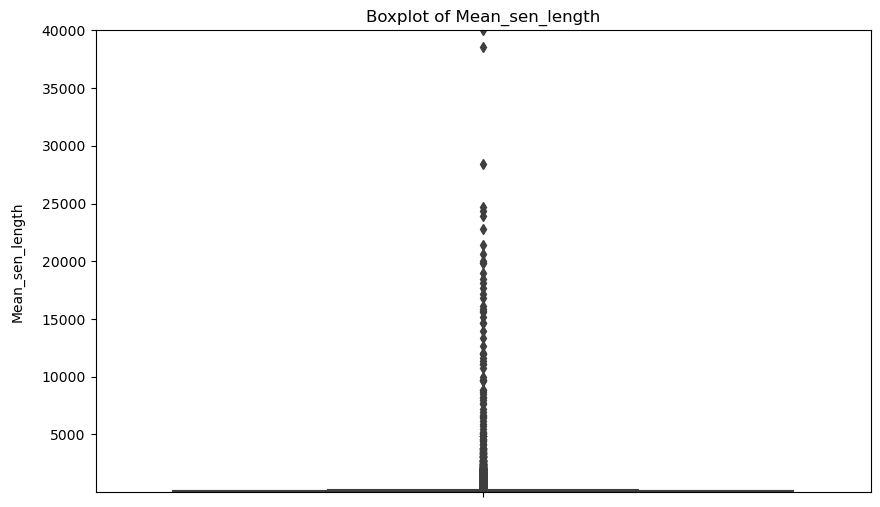

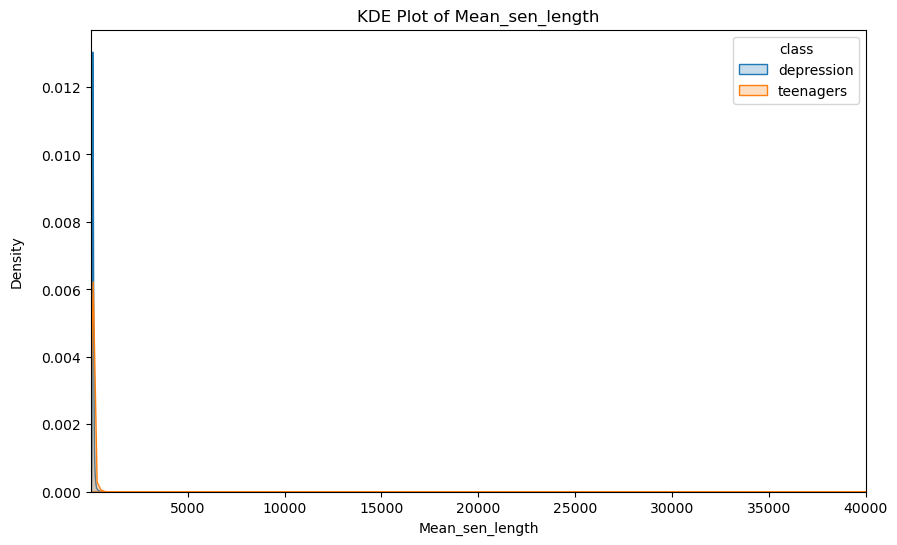

In [19]:

def visualize(col):
    plt.figure(figsize=(10, 6))  # Adjust figure size if needed
    
    # Calculate the minimum and maximum values for the column
    min_val = df[col].min()
    max_val = df[col].max()
    print(df[col].name,min_val,max_val)

    # Create the boxplot
    sns.boxplot(y=df[col], hue=df['class'])
    plt.ylabel(col, labelpad=12.5)
    plt.title(f'Boxplot of {col}')  # Add title
    plt.ylim(min_val, max_val)  # Set y-axis limits based on min and max values
    
    # Create the KDE plot
    plt.figure(figsize=(10, 6))  # Adjust figure size if needed
    for class_cat in df['class'].unique():
        sns.kdeplot(df[df['class'] == class_cat][col], label=class_cat, fill=True)
    plt.ylabel('Density', labelpad=12.5)
    plt.title(f'KDE Plot of {col}')  # Add title
    plt.legend(title='class')  # Add legend
    plt.xlim(min_val, max_val)  # Set x-axis limits based on min and max values
    
    plt.show()

# Assuming data is your DataFrame
features = df.columns[3:]  # Exclude first two columns if they are not needed
for feature in features:
    visualize(feature)



In [20]:
#Drop length
df = df.drop(features,axis=1)
df.head()

text       class  \
0  Does life actually work for most / non-depress...  depression   
1  I found my friend's bodyIt was almost nine yea...  depression   
2  Am I weird I don't get affected by compliments...   teenagers   
3  Finally 2020 is almost over... So I can never ...   teenagers   
4  Reddit, I've never opened up to anyone with my...  depression   

  sentiment_label  
0        Positive  
1        Negative  
2        Positive  
3        Negative  
4        Negative

In [21]:
#Convert to LOWERCASE
df['Text_Lower'] = df['text'].str.lower()
df.head()

text       class  \
0  Does life actually work for most / non-depress...  depression   
1  I found my friend's bodyIt was almost nine yea...  depression   
2  Am I weird I don't get affected by compliments...   teenagers   
3  Finally 2020 is almost over... So I can never ...   teenagers   
4  Reddit, I've never opened up to anyone with my...  depression   

  sentiment_label                                         Text_Lower  
0        Positive  does life actually work for most / non-depress...  
1        Negative  i found my friend's bodyit was almost nine yea...  
2        Positive  am i weird i don't get affected by compliments...  
3        Negative  finally 2020 is almost over... so i can never ...  
4        Negative  reddit, i've never opened up to anyone with my...

In [22]:
#Detect ANY Contractions
# Function to expand contractions in text
def detect_contractions(text):
    return contractions.fix(text)

expanded_text = df['Text_Lower'].apply(detect_contractions)

# Detect contractions in the expanded text
detected_contractions = expanded_text.apply(lambda x: [word for word in x.split() if "'" in word])

# Get the total number of detected contractions
total_contractions = detected_contractions.apply(len).sum()

# Print the total number of detected contractions
print("Total number of detected contractions:", total_contractions)

Total number of detected contractions: 59935


In [23]:
# Function to detect punctuation in text
def detect_punctuation(text):
    punctuation_pattern = r'[^\w\s]' 
    punctuation_symbols = re.findall(punctuation_pattern, text)
    return len(punctuation_symbols) > 0  # Return True if detected

punctuation_detected = any(df['Text_Lower'].apply(detect_punctuation))

print("Punctuation Detected:",punctuation_detected)

Punctuation Detected: True


In [24]:
#Detect StopWords
# Get the English stopwords
stop_words = set(stopwords.words('english'))

# Function to detect stopwords in text
def detect_stopwords_in_df(df, column_name):
    def detect_stopwords(text):
        words = text.split()  # Tokenize the text into words
        stopwords_found = [word for word in words if word.lower() in stop_words] 
        return len(stopwords_found) > 0  # Return True if found, False otherwise

    # Apply the detect_stopwords function to the specified column
    stopwords_detected = df[column_name].apply(detect_stopwords)
    return any(stopwords_detected)

stopwords_detected = detect_stopwords_in_df(df, 'Text_Lower')
print("StopWords Detected:",stopwords_detected)

StopWords Detected: True


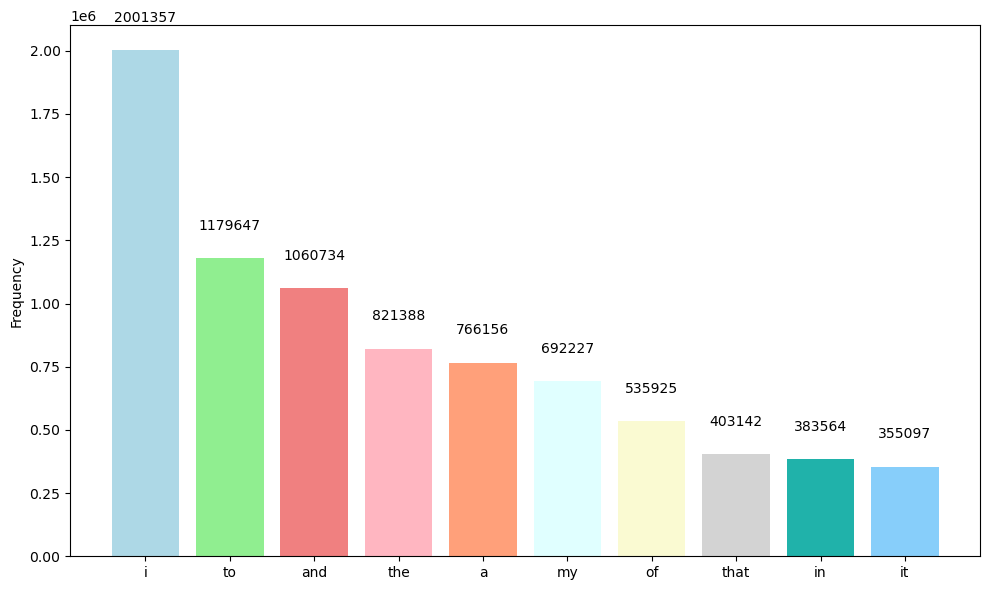

In [25]:
#Top Stopwords Barchart
stop_words = set(stopwords.words('english'))

def stop_words_barchart(text):
    words = text.str.split()
    words = words.values.tolist()
    corpus = [word for i in words for word in i]
    dic = defaultdict(int)
    for word in corpus:
        if word in stop_words:
            dic[word] += 1
    top = sorted(dic.items(), key=lambda x: x[1], reverse=True)[:10]
    x, y = zip(*top)
    
    # Customizing the plot
    light_colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightpink', 'lightsalmon',
                'lightcyan', 'lightgoldenrodyellow', 'lightgray', 'lightseagreen', 'lightskyblue']
    plt.figure(figsize=(10, 6))
    bars = plt.bar(x, y, color=light_colors)
    plt.ylabel('Frequency')  # Add a label for the y-axis
    
    # Displaying the values on the bars
    for bar, frequency in zip(bars, y):
        plt.text(bar.get_x() + bar.get_width() / 2, 
                 bar.get_height() + 0.05 * max(y),  # Adjust the position above the bar
                 f'{frequency:.0f}',  # Format the frequency value as a decimal with no decimal places
                 ha='center', va='bottom', color='black')  # Horizontal alignment and vertical alignment
    plt.tight_layout()  # Adjust layout to prevent clipping of labels
    

stop_words_barchart(df['Text_Lower']) 
plt.show()


In [26]:
#Detect Any Digit
# Function to detect digits in text
def detect_digits(text):
    # Regular expression pattern to match digits
    digit_pattern = r'\d+'
    # Find all digits in the text using the regular expression pattern
    digits = re.findall(digit_pattern, text)
    return digits

# Assuming 'text_data' is the name of the column containing text data
detect_digits_result = df['Text_Lower'].apply(lambda x: detect_digits(str(x)))  

# Flatten the list of detected digits and count the total number of digits
total_digits = sum(len(digits) for digits in detect_digits_result)

# Print the total number of digits
print("Total number of digits detected:", total_digits)

Total number of digits detected: 357142


In [27]:
#Detected Any URLs
def detect_urls(text):
    # Regular expression pattern to match URLs
    url_pattern = r'https?://\S+|www\.\S+'
    # Find all URLs in the text using the regular expression pattern
    urls = re.findall(url_pattern, text)
    return urls

detect_url = df['Text_Lower'].apply(detect_urls)

# Count the total number of URLs across all rows
total_urls = sum(len(urls) for urls in detect_url)

# Print the total number of URLs
print("Total number of URLs detected:", total_urls)

Total number of URLs detected: 12109


In [28]:
#Detect HTML tags
def detect_html_tags(text):
    # Regular expression pattern to match HTML tags
    html_tag_pattern = r'<[^>]+>'
    # Find all HTML tags in the text using the regular expression pattern
    html_tags = re.findall(html_tag_pattern, text)
    return html_tags
html_tags_detected = df['Text_Lower'].apply(lambda x: detect_html_tags(str(x)))

total_html_tags = sum(html_tags_detected.apply(len))
print("Total number of detected HTML tags:", total_html_tags)

Total number of detected HTML tags: 1


In [29]:
#Detect ChatWords
#chatwordmapping
def detect_and_count_chat_words(text):
    chat_word_mapping = {
        "AFAIK": "As Far As I Know",
        "AFK": "Away From Keyboard",
        "ASAP": "As Soon As Possible",
        "ATK": "At The Keyboard",
        "ATM": "At The Moment",
        "A3": "Anytime, Anywhere, Anyplace",
        "BAK": "Back At Keyboard",
        "BBL": "Be Back Later",
        "BBS": "Be Back Soon",
        "BFN": "Bye For Now",
        "B4N": "Bye For Now",
        "BRB": "Be Right Back",
        "BRT": "Be Right There",
        "BTW": "By The Way",
        "B4": "Before",
        "B4N": "Bye For Now",
        "CU": "See You",
        "CUL8R": "See You Later",
        "CYA": "See You",
        "FAQ": "Frequently Asked Questions",
        "FC": "Fingers Crossed",
        "FWIW": "For What It's Worth",
        "FYI": "For Your Information",
        "GAL": "Get A Life",
        "GG": "Good Game",
        "GN": "Good Night",
        "GMTA": "Great Minds Think Alike",
        "GR8": "Great!",
        "G9": "Genius",
        "IC": "I See",
        "ICQ": "I Seek you (also a chat program)",
        "ILU": "ILU: I Love You",
        "IMHO": "In My Honest/Humble Opinion",
        "IMO": "In My Opinion",
        "IOW": "In Other Words",
        "IRL": "In Real Life",
        "KISS": "Keep It Simple, Stupid",
        "LDR": "Long Distance Relationship",
        "LMAO": "Laugh My Ass Off",
        "LOL": "Laughing Out Loud",
        "LTNS": "Long Time No See",
        "L8R": "Later",
        "MTE": "My Thoughts Exactly",
        "M8": "Mate",
        "NRN": "No Reply Necessary",
        "OIC": "Oh I See",
        "PITA": "Pain In The Ass",
        "PRT": "Party",
        "PRW": "Parents Are Watching",
        "ROFL": "Rolling On The Floor Laughing",
        "ROFLOL": "Rolling On The Floor Laughing Out Loud",
        "ROTFLMAO": "Rolling On The Floor Laughing My Ass Off",
        "SK8": "Skate",
        "STATS": "Your sex and age",
        "ASL": "Age, Sex, Location",
        "THX": "Thank You",
        "TTFN": "Ta-Ta For Now!",
        "TTYL": "Talk To You Later",
        "U": "You",
        "U2": "You Too",
        "U4E": "Yours For Ever",
        "WB": "Welcome Back",
        "WTF": "What The Fuck",
        "WTG": "Way To Go!",
        "WUF": "Where Are You From?",
        "W8": "Wait...",
        "7K": "Sick:-D Laughter",
    }
    words = text.split()
    chat_words = [word for word in words if word.upper() in chat_word_mapping]
    return Counter(chat_words)

# Function to detect and count chat words in the text data
def detect_and_count_chat_words_in_dataframe(dataframe, column_name):
    # Combine all text samples into a single string
    text_data = ' '.join(dataframe[column_name])
    # Detect and count chat words in the combined text
    chat_word_counts = detect_and_count_chat_words(text_data)
    return any(chat_word_counts)

chat_word_counts = detect_and_count_chat_words_in_dataframe(df, 'Text_Lower')
print("Chat Words Detected:",chat_word_counts)

Chat Words Detected: True


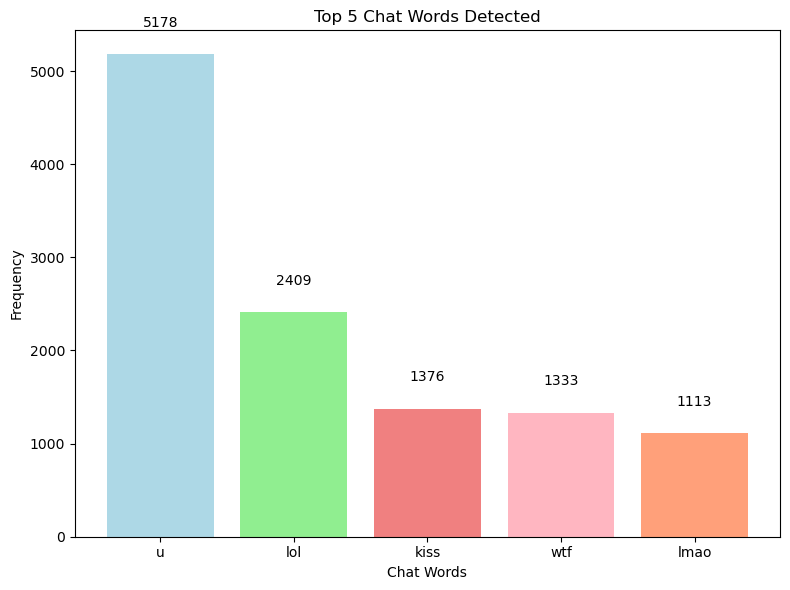

In [30]:
#Bar chart Top 5 Chat Words Detected
# Get the top 5 chat words detected
# Function to detect and count chat words in the text data
def detect_and_count_chat_words_in_dataframe(dataframe, column_name):
    # Combine all text samples into a single string
    text_data = ' '.join(dataframe[column_name])
    # Detect and count chat words in the combined text
    chat_word_counts = detect_and_count_chat_words(text_data)
    return chat_word_counts

chat_word_counts = detect_and_count_chat_words_in_dataframe(df, 'Text_Lower')
top_chat_words = chat_word_counts.most_common(5)
# Extract the chat words and their counts
chat_words, counts = zip(*top_chat_words)

# Create a bar chart
light_colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightpink', 'lightsalmon']
plt.figure(figsize=(8, 6))  # Reduce the size of the figure
bars = plt.bar(chat_words, counts, color=light_colors)
plt.xlabel('Chat Words')
plt.ylabel('Frequency')
plt.title('Top 5 Chat Words Detected')

# Add value labels to the bars
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05 * max(counts),
             f'{count}', ha='center', va='bottom', color='black')

plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [31]:
# Detect Emojis
def detect_emojis(df, text_column):
    # Define a regular expression pattern to match emojis
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F700-\U0001F77F"  # alchemical symbols
                               u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                               u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                               u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                               u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                               u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                               u"\U00002702-\U000027B0"  # Dingbats
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)

    # Function to detect emojis in a text string
    def detect_emojis_in_text(text):
        if emoji_pattern.search(text):
            return True
        return False

    # Apply the emoji detection function to each text in the specified column
    emojis_detected = df[text_column].apply(detect_emojis_in_text)

    return any(emojis_detected)

emojis_detected = detect_emojis(df, 'Text_Lower')
print("Emoji Detected:",emojis_detected)

Emoji Detected: True


In [32]:
#Show Top 10 Emojis 
def detect_emojis(df, tokenized_text_column):
    # Define a regular expression pattern to match emojis
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F700-\U0001F77F"  # alchemical symbols
                               u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                               u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                               u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                               u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                               u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                               u"\U00002702-\U000027B0"  # Dingbats
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)

    # Function to detect emojis in a token list
    def detect_emojis_in_token_list(token_list):
        return [emoji for token in token_list for emoji in emoji_pattern.findall(token)]

    # Apply the emoji detection function to each tokenized text in the specified column
    detected_emojis = df[tokenized_text_column].apply(detect_emojis_in_token_list)

    # Flatten the list of detected emojis
    all_detected_emojis = [emoji for sublist in detected_emojis for emoji in sublist]

    # Count the occurrences of each emoji
    emojis_count = Counter(all_detected_emojis)

    # Sort the emojis by count and get the top 10
    top_10_emojis = sorted(emojis_count.items(), key=lambda x: x[1], reverse=True)[:10]

    # Prepare data for the table
    table_data = [(emoji, count) for emoji, count in top_10_emojis]

    # Define headers for the table
    headers = ["Emoji", "Count"]

    # Generate the table
    table = tabulate(table_data, headers=headers, tablefmt="grid")

    # Return the table as a string
    return table

depression_df = df[df['class'] == 'depression']
emoji_table = detect_emojis(depression_df, 'Text_Lower')
print("Top 10 Emojis in Rows where 'class' is 'depression':")
print(emoji_table)

Top 10 Emojis in Rows where 'class' is 'depression':
+---------+---------+
| Emoji   |   Count |
+=========+=========+
| 😔      |      35 |
+---------+---------+
| ❤       |      27 |
+---------+---------+
| 토      |      26 |
+---------+---------+
| 렌      |      26 |
+---------+---------+
| 😭      |      25 |
+---------+---------+
| ️        |      24 |
+---------+---------+
| 😢      |      24 |
+---------+---------+
| ？      |      18 |
+---------+---------+
| 😞      |      18 |
+---------+---------+
| 트      |      16 |
+---------+---------+


In [33]:
#Show Top 10 Emojis -> Teenagers
def detect_emojis(df, tokenized_text_column):
    # Define a regular expression pattern to match emojis
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F700-\U0001F77F"  # alchemical symbols
                               u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                               u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                               u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                               u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                               u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                               u"\U00002702-\U000027B0"  # Dingbats
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)

    # Function to detect emojis in a token list
    def detect_emojis_in_token_list(token_list):
        return [emoji for token in token_list for emoji in emoji_pattern.findall(token)]

    # Apply the emoji detection function to each tokenized text in the specified column
    detected_emojis = df[tokenized_text_column].apply(detect_emojis_in_token_list)

    # Flatten the list of detected emojis
    all_detected_emojis = [emoji for sublist in detected_emojis for emoji in sublist]

    # Count the occurrences of each emoji
    emojis_count = Counter(all_detected_emojis)

    # Sort the emojis by count and get the top 10
    top_10_emojis = sorted(emojis_count.items(), key=lambda x: x[1], reverse=True)[:10]

    # Prepare data for the table
    table_data = [(emoji, count) for emoji, count in top_10_emojis]

    # Define headers for the table
    headers = ["Emoji", "Count"]

    # Generate the table
    table = tabulate(table_data, headers=headers, tablefmt="grid")

    # Return the table as a string
    return table

depression_df = df[df['class'] == 'teenagers']
emoji_table = detect_emojis(depression_df, 'Text_Lower')
print("Top 10 Emojis in Rows where 'class' is 'teenagers':")
print(emoji_table)

Top 10 Emojis in Rows where 'class' is 'teenagers':
+---------+---------+
| Emoji   |   Count |
+=========+=========+
| ⣿       |   49371 |
+---------+---------+
| ⠀       |   37049 |
+---------+---------+
| 🤡      |   27458 |
+---------+---------+
| 🗿      |   19222 |
+---------+---------+
| ㅤ      |   17342 |
+---------+---------+
| ⠄       |   14885 |
+---------+---------+
| 🎱      |   12013 |
+---------+---------+
| 😂      |    7136 |
+---------+---------+
| 𒐫       |    5508 |
+---------+---------+
| ️        |    4475 |
+---------+---------+


In [34]:
#Detect Foreign Language
def detect_language(text):
    try:
        return detect(text)
    except:
        return None

# Function to detect foreign languages in a DataFrame column
def detect_foreign_languages(df, text_column):
    # Apply language detection function to each text in the specified column
    detected_languages = df[text_column].apply(detect_language)
    # Count the occurrences of each detected language
    language_counts = Counter(detected_languages)
    # Remove occurrences of 'en' (English) as it's not considered foreign in this case
    del language_counts['en']
    
    top_foreign_languages = language_counts.most_common(5)
    return top_foreign_languages

top_foreign_languages = detect_foreign_languages(df, 'Text_Lower')
print("Foreign Language Detected: ",any(top_foreign_languages))

Foreign Language Detected:  True


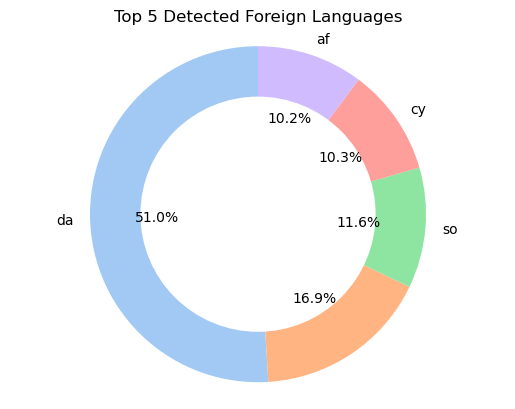

('da', None, 'so', 'cy', 'af')


In [35]:
# Function to plot donut plot
def plot_donut(labels, sizes):
    custom_palette = sns.color_palette("pastel", len(labels))
    fig, ax = plt.subplots()
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=custom_palette)
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

    # Draw a circle at the center to make it a donut plot
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig.gca().add_artist(centre_circle)
    plt.title('Top 5 Detected Foreign Languages')
    plt.show()
languages, occurrences = zip(*top_foreign_languages)
plot_donut(languages, occurrences)
print(languages)

In [36]:
#Detect Special Symbols 
def detect_special_symbols(text):
    pattern = r'[^a-zA-Z0-9\s]'  # Define pattern to match special symbols
    if re.search(pattern, text):
        return True
    return False

special_symbols_detected = df['Text_Lower'].apply(detect_special_symbols)
print("Special Symbols Detected:",special_symbols_detected.any())

Special Symbols Detected: True


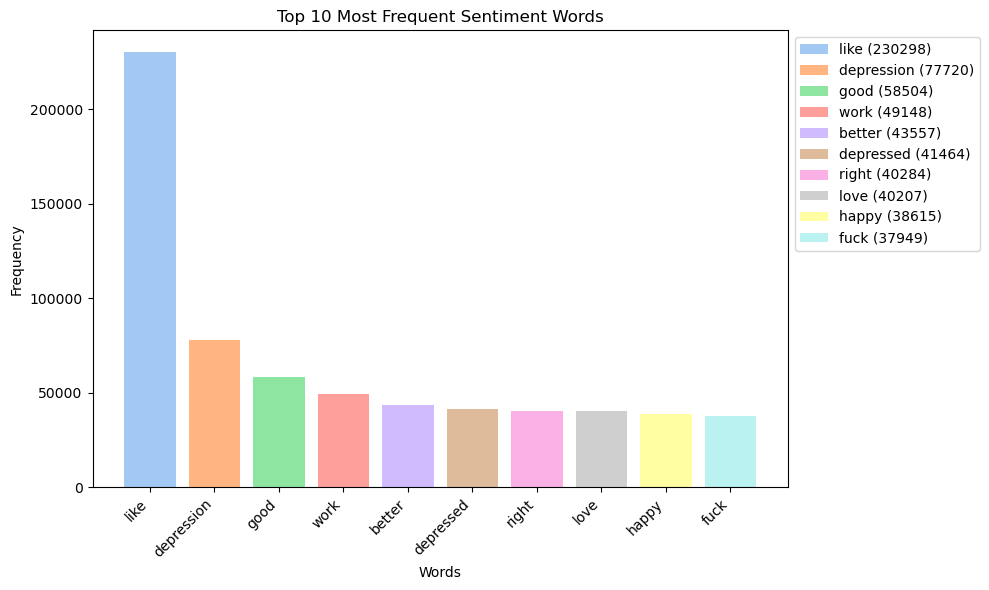

In [37]:
#Most Frequency Words - Positive & Negative (BarChart)
def filter_by_sentiment(text, sentiment_words):
    tokens = word_tokenize(text)  # Tokenize the text
    words = [word for word in tokens if word in sentiment_words]
    return words

# Get the positive and negative words from the opinion lexicon
positive_words = set(opinion_lexicon.positive())
negative_words = set(opinion_lexicon.negative())

# Combine positive and negative words
sentiment_words = positive_words.union(negative_words)

# Filter words based on sentiment
sentiment_filtered_words = df['Text_Lower'].apply(lambda x: filter_by_sentiment(x, sentiment_words))

# Flatten the list of sentiment words
all_sentiment_words = [word for sublist in sentiment_filtered_words for word in sublist]

# Count the frequency of sentiment words
word_counts = Counter(all_sentiment_words)

# Get the top 10 most frequent sentiment words
top_sentiment_words = dict(word_counts.most_common(10))

# Choose a color palette from seaborn (you can choose another palette if you prefer)
colors = sns.color_palette('pastel')

# Display the result as a bar plot with different colors for each bar
plt.figure(figsize=(10, 6))
bars = plt.bar(top_sentiment_words.keys(), top_sentiment_words.values(), color=colors)

# Add labels and title
plt.title('Top 10 Most Frequent Sentiment Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')

# Add custom legend for each bar
legend_labels = [f'{word} ({count})' for word, count in top_sentiment_words.items()]
plt.legend(bars, legend_labels, loc='upper left', bbox_to_anchor=(1, 1))

# Show the bar plot
plt.tight_layout()
plt.show()

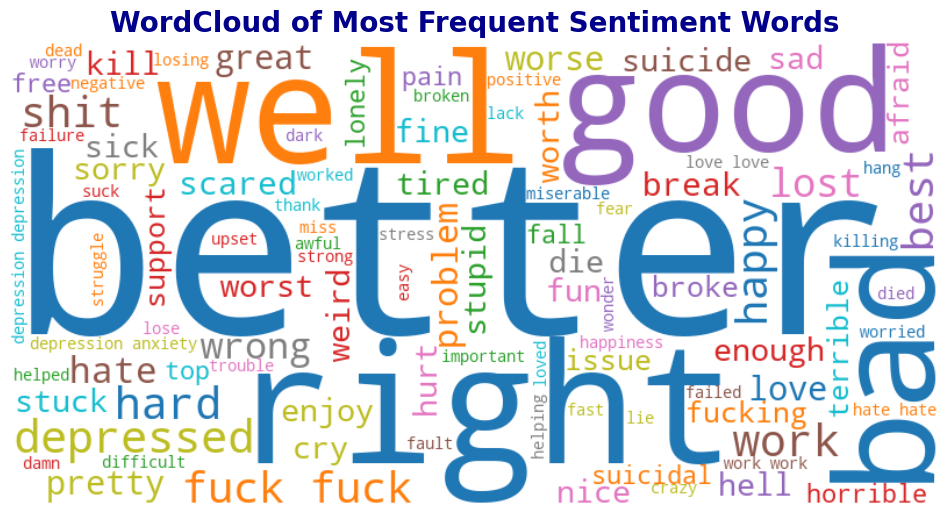

In [38]:
#Most Frequency Words - Positive & Negative (WordCloud)
# Convert the sentiment word counts to a string
wordcloud_text = ' '.join(all_sentiment_words)
# Generate the WordCloud with additional customization
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='tab10',
                      contour_width=3, contour_color='steelblue', max_words=100).generate(wordcloud_text)

# Display the WordCloud with more visual appeal
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axis
plt.title('WordCloud of Most Frequent Sentiment Words', fontsize=20, color='darkblue', fontweight='bold')
plt.show()


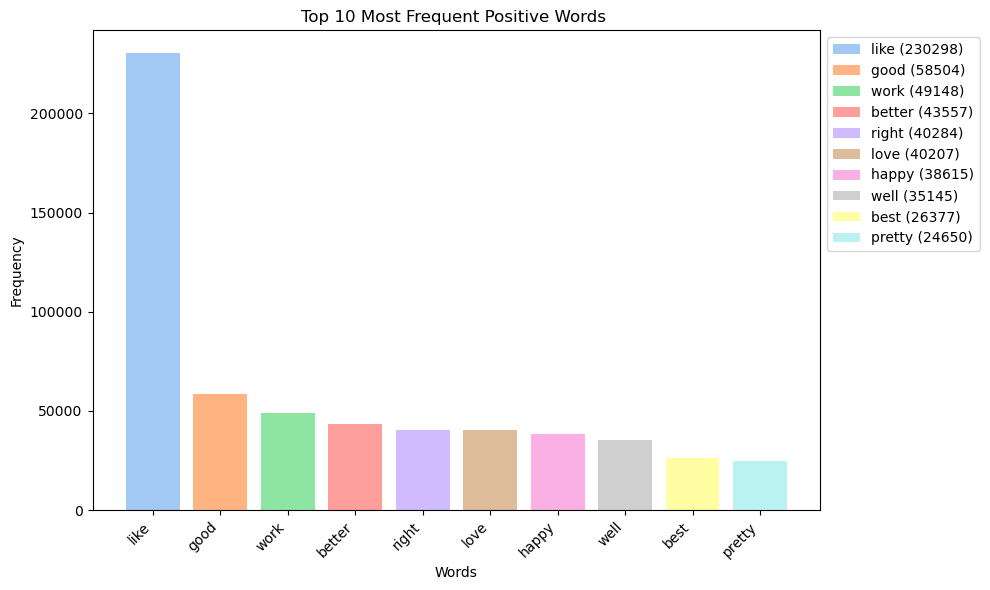

In [39]:
#2. Positive (Barchart)
# Function to filter words based on sentiment
def filter_by_sentiment(text, positive_words):
    tokens = word_tokenize(text)  # Tokenize the text
    words = [word for word in tokens if word in positive_words]
    return words

# Get the positive and negative words from the opinion lexicon
positive_words = set(opinion_lexicon.positive())

# Filter words based on sentiment
sentiment_positive_words = df['Text_Lower'].apply(lambda x: filter_by_sentiment(x, positive_words))

# Flatten the list of sentiment words
all_sentiment_pos_words = [word for sublist in sentiment_positive_words for word in sublist]

# Count the frequency of sentiment words
pos_word_counts = Counter(all_sentiment_pos_words)

# Get the top 10 most frequent sentiment words
top_sentiment_pos_words = dict(pos_word_counts.most_common(10))

# Choose a color palette from seaborn (you can choose another palette if you prefer)
colors = sns.color_palette('pastel')

# Display the result as a bar plot with different colors for each bar
plt.figure(figsize=(10, 6))
bars = plt.bar(top_sentiment_pos_words.keys(), top_sentiment_pos_words.values(), color=colors)

# Add labels and title
plt.title('Top 10 Most Frequent Positive Words ')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')

# Add custom legend for each bar
legend_labels = [f'{word} ({count})' for word, count in top_sentiment_pos_words.items()]
plt.legend(bars, legend_labels, loc='upper left', bbox_to_anchor=(1, 1))

# Show the bar plot
plt.tight_layout()
plt.show()


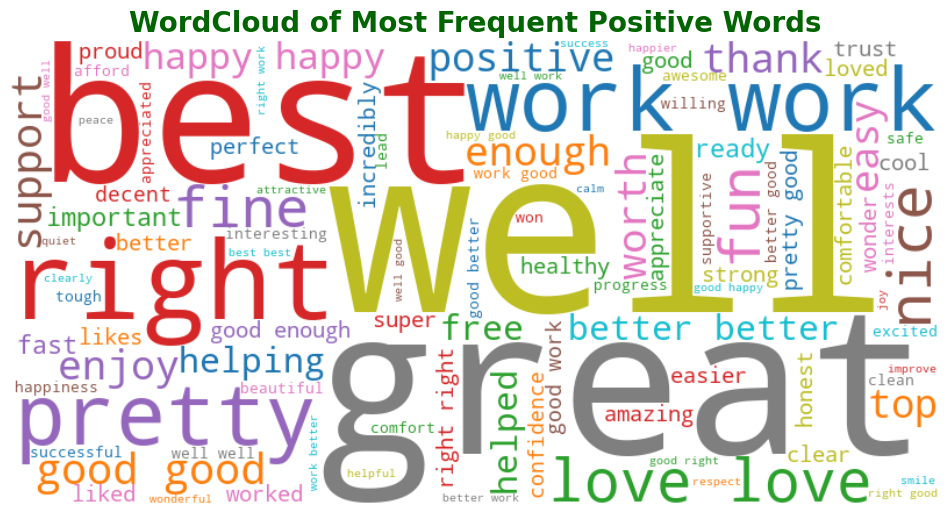

In [40]:
#Most Frequency Words - Positive (WordCloud)
# Convert the sentiment word counts to a string
wordcloud_text = ' '.join(all_sentiment_pos_words)

# Generate the WordCloud with additional customization
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='tab10',
                      contour_width=2, contour_color='blue', max_words=100).generate(wordcloud_text)

# Display the WordCloud with more visual appeal
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axis
plt.title('WordCloud of Most Frequent Positive Words', fontsize=20, color='darkgreen', fontweight='bold')
plt.show()


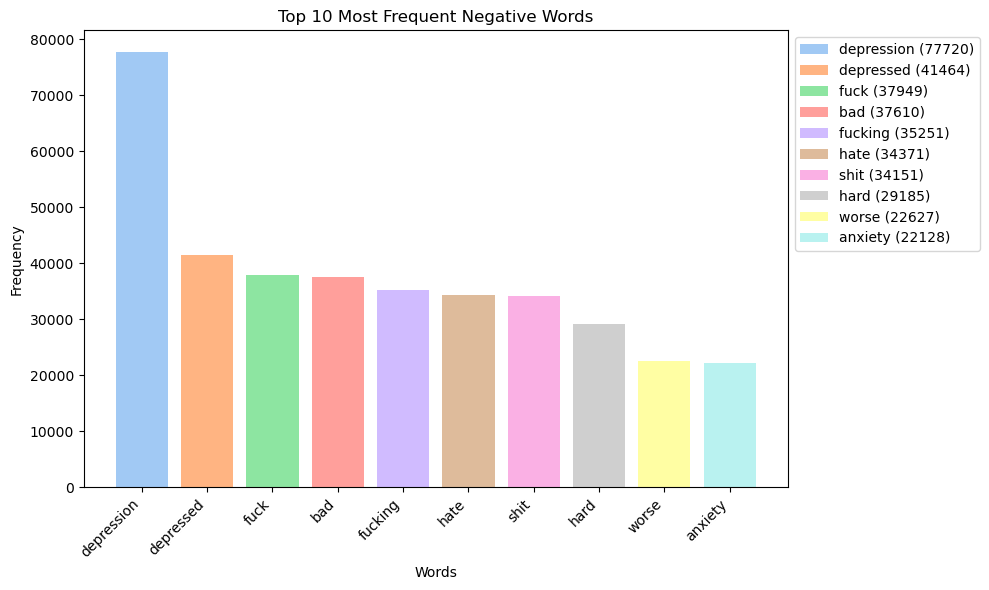

In [41]:
#3. Negative (Barchart)
# Function to filter words based on sentiment
def filter_by_sentiment(text, negative_words):
    tokens = word_tokenize(text)  # Tokenize the text
    words = [word for word in tokens if word in negative_words]
    return words

negative_words = set(opinion_lexicon.negative())

# Filter words based on sentiment
sentiment_negative_words = df['Text_Lower'].apply(lambda x: filter_by_sentiment(x, negative_words))

# Flatten the list of sentiment words
all_sentiment_neg_words = [word for sublist in sentiment_negative_words for word in sublist]

# Count the frequency of sentiment words
neg_word_counts = Counter(all_sentiment_neg_words)

# Get the top 10 most frequent sentiment words
top_sentiment_neg_words = dict(neg_word_counts.most_common(10))

# Choose a color palette from seaborn (you can choose another palette if you prefer)
colors = sns.color_palette('pastel')

# Display the result as a bar plot with different colors for each bar
plt.figure(figsize=(10, 6))
bars = plt.bar(top_sentiment_neg_words.keys(), top_sentiment_neg_words.values(), color=colors)

# Add labels and title
plt.title('Top 10 Most Frequent Negative Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')

# Add custom legend for each bar
legend_labels = [f'{word} ({count})' for word, count in top_sentiment_neg_words.items()]
plt.legend(bars, legend_labels, loc='upper left', bbox_to_anchor=(1, 1))

# Show the bar plot
plt.tight_layout()
plt.show()


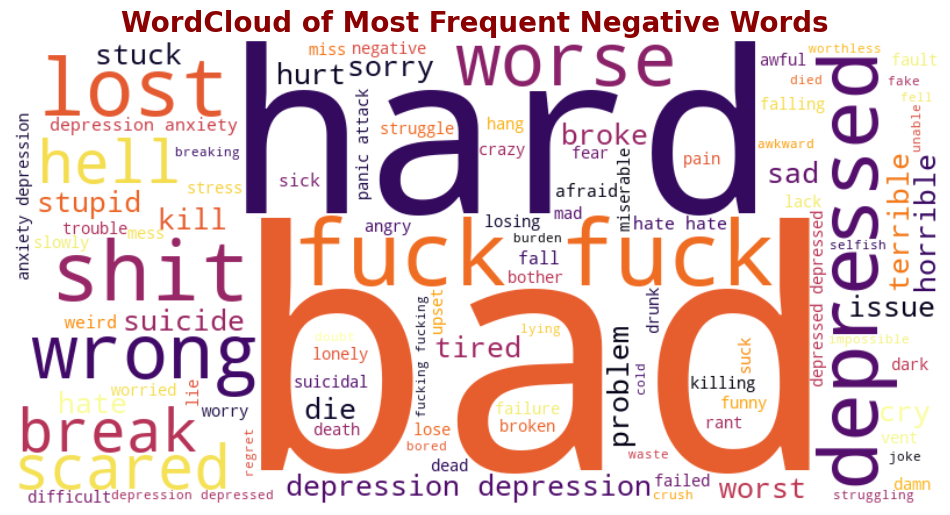

In [42]:
#Most Frequency Words - Negative (WordCloud)
# Convert the sentiment word counts to a string
wordcloud_text = ' '.join(all_sentiment_neg_words)

# Generate the WordCloud with additional customization
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='inferno',
                      contour_width=2, contour_color='red', max_words=100).generate(wordcloud_text)

# Display the WordCloud with more visual appeal
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axis
plt.title('WordCloud of Most Frequent Negative Words', fontsize=20, color='darkred', fontweight='bold')
plt.show()


In [43]:
#4. Neutral (Treemap) 
# Function to filter words based on sentiment
def filter_by_sentiment(text, positive_words, negative_words):
    tokens = word_tokenize(text)  # Tokenize the text
    words = [word for word in tokens if word not in positive_words and word not in negative_words]
    return words

# Get the set of positive and negative words from the opinion lexicon
positive_words = set(opinion_lexicon.positive())
negative_words = set(opinion_lexicon.negative())

# Filter words based on sentiment
sentiment_neutral_words = df['Text_Lower'].apply(lambda x: filter_by_sentiment(x, positive_words, negative_words))

# Flatten the list of sentiment words
all_sentiment_neutral_words = [word for sublist in sentiment_neutral_words for word in sublist]

# Count the frequency of sentiment words
neutral_word_counts = Counter(all_sentiment_neutral_words)

# Get the top 10 most frequent neutral words
top_sentiment_neutral_words = dict(neutral_word_counts.most_common(10))

# Convert word counts to proportions
total_count = sum(top_sentiment_neutral_words.values())
sizes = [count / total_count for count in top_sentiment_neutral_words.values()]

# Create labels for treemap rectangles
labels = [f'{word}\n({count})' for word, count in top_sentiment_neutral_words.items()]

# Create DataFrame for treemap
data = {
    'label': labels,
    'size': sizes
}
df_treemap = pd.DataFrame(data)

# Create treemap figure
fig = px.treemap(df_treemap, path=['label'], values='size', color='size', color_continuous_scale='Viridis')

# Update treemap layout
fig.update_layout(title='Top 10 Most Frequent Neutral Words')

# Show the treemap
fig.show()


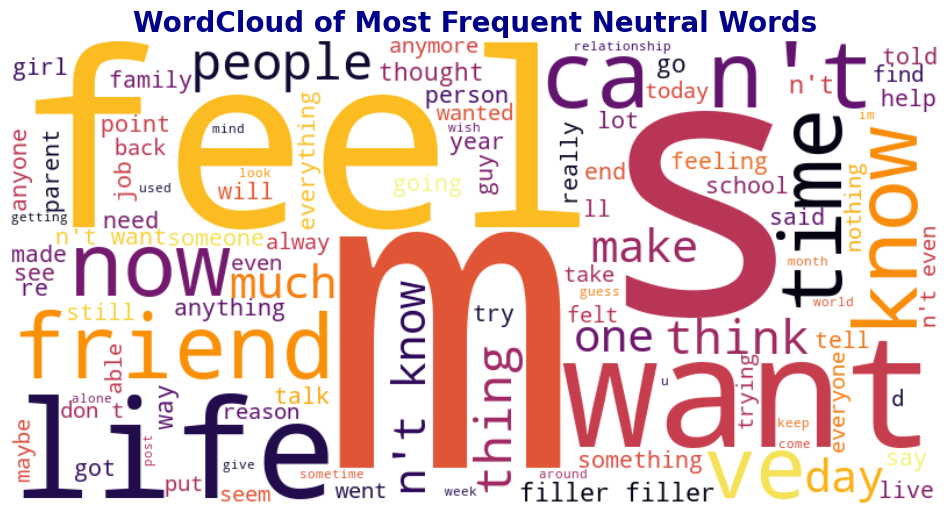

In [44]:
#Most Frequency Words - Neutral (WordCloud)
# Convert the sentiment word counts to a string
wordcloud_text = ' '.join(all_sentiment_neutral_words)

# Generate the WordCloud with additional customization
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='inferno',
                      contour_width=2, contour_color='blue', max_words=100).generate(wordcloud_text)

# Display the WordCloud with more visual appeal
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axis
plt.title('WordCloud of Most Frequent Neutral Words', fontsize=20, color='darkblue', fontweight='bold')
plt.show()


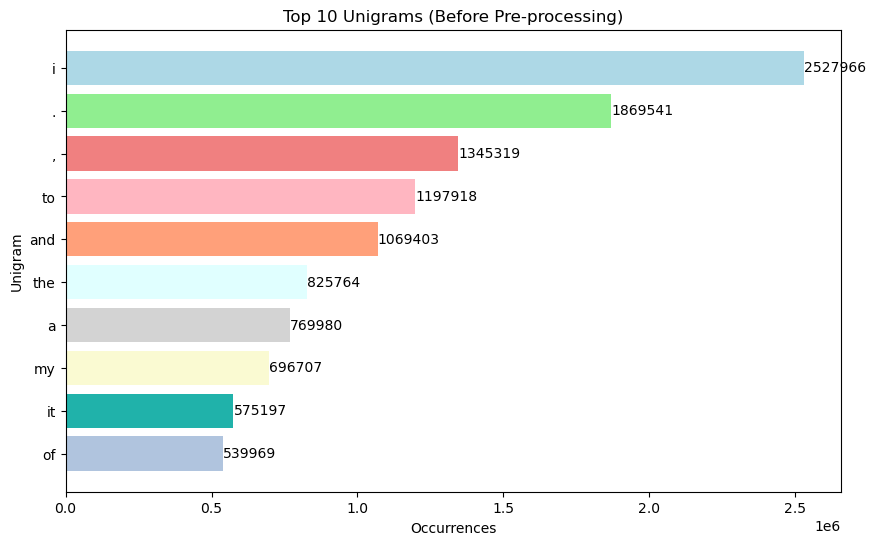

In [45]:
#Unigram (Before)
def extract_unigrams(text):
    tokens = word_tokenize(text.lower())  # Tokenize the text and convert to lowercase
    return tokens

# Function to perform unigram analysis on DataFrame
def unigram_analysis(df):
    unigram_counts = Counter()
    for text in df['Text_Lower']:
        unigrams_list = extract_unigrams(text)
        unigram_counts.update(unigrams_list)
    
    # Extract the top 10 most common unigrams and their counts
    top_unigrams = unigram_counts.most_common(10)
    return top_unigrams
light_colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightpink', 'lightsalmon', 'lightcyan', 'lightgray', 'lightgoldenrodyellow', 'lightseagreen', 'lightsteelblue']

# Perform unigram analysis on the DataFrame and plot the results
def plot_unigram_analysis(df):
    top_unigrams = unigram_analysis(df)
    unigrams, counts = zip(*top_unigrams)
    
    # Create a bar chart with light colors
    plt.figure(figsize=(10, 6))
    bars = plt.barh(unigrams, counts, color=light_colors)
    plt.xlabel('Occurrences')
    plt.ylabel('Unigram')
    plt.title('Top 10 Unigrams (Before Pre-processing)')
    plt.gca().invert_yaxis()  # Invert y-axis to display highest count at the top
    
    # Add data labels to the bars
    for i, v in enumerate(counts):
        plt.text(v + 0.1, i, str(v), color='black', va='center')  # Add data label next to the bar
    
    plt.show()

# Perform unigram analysis and plot the results
plot_unigram_analysis(df)



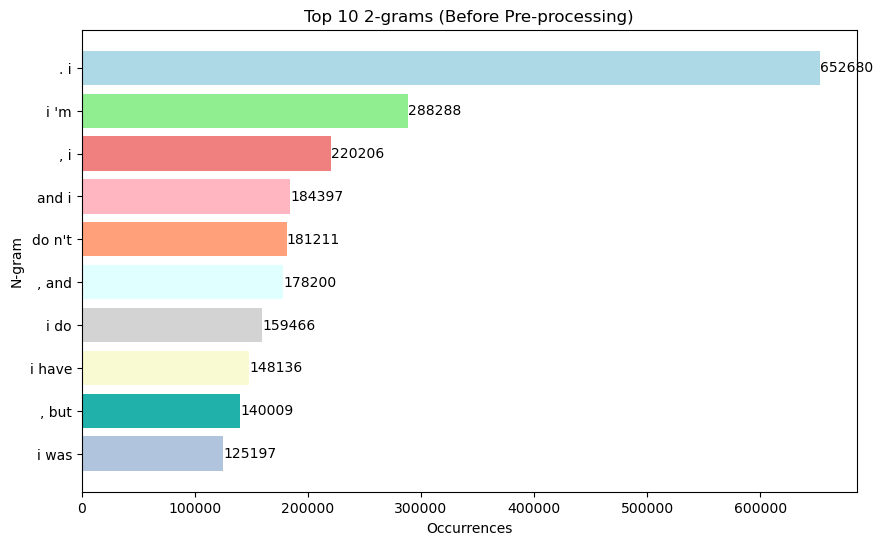

In [46]:
# Bi-gram Explore (Before Pre-Processing)
# Function to extract N-grams from text
def extract_ngrams(text, n):
    tokens = word_tokenize(text.lower())  # Tokenize the text and convert to lowercase
    n_grams = ngrams(tokens, n)
    return [' '.join(gram) for gram in n_grams]

# Function to perform N-gram analysis on DataFrame
def ngram_analysis(df, n):
    ngram_counts = Counter()
    for text in df['Text_Lower']:
        ngrams_list = extract_ngrams(text, n)
        ngram_counts.update(ngrams_list)
    
    # Extract the top N most common N-grams and their counts
    top_ngrams = ngram_counts.most_common(10)
    return top_ngrams

# Perform N-gram analysis on the DataFrame and plot the results
light_colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightpink', 'lightsalmon', 'lightcyan', 'lightgray', 'lightgoldenrodyellow', 'lightseagreen', 'lightsteelblue']
def plot_ngram_analysis(df, n):
    top_ngrams = ngram_analysis(df, n)
    ngrams, counts = zip(*top_ngrams)
    
    # Create a bar chart
    plt.figure(figsize=(10, 6))
    plt.barh(ngrams, counts, color=light_colors)
    plt.xlabel('Occurrences')
    plt.ylabel('N-gram')
    plt.title(f'Top 10 {n}-grams (Before Pre-processing)')
    plt.gca().invert_yaxis()  # Invert y-axis to display highest count at the top
    
    # Add data labels to the bars
    for i, v in enumerate(counts):
        plt.text(v + 0.1, i, str(v), color='black', va='center')  # Add data label next to the bar
    
    plt.show()

# Perform N-gram analysis and plot the results
n = 2  # Change this to the desired N-gram size
plot_ngram_analysis(df, n)

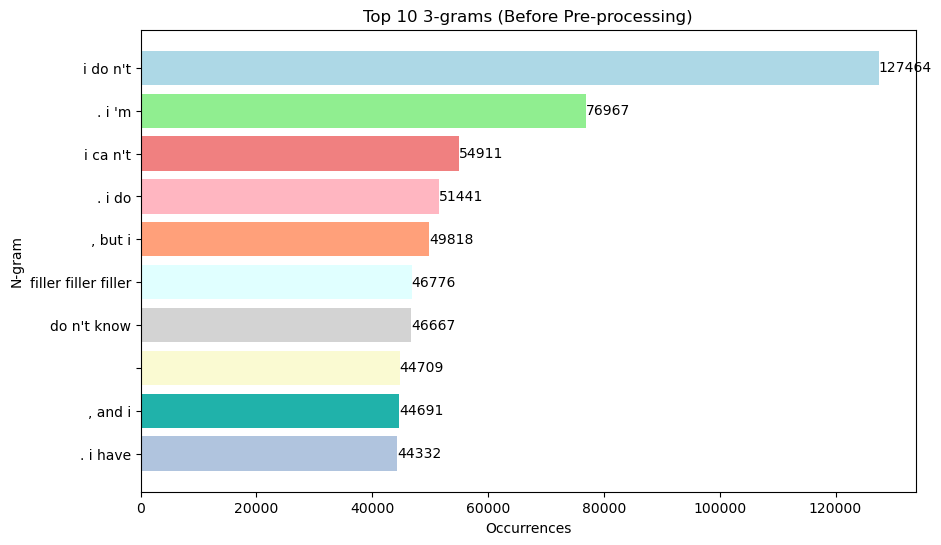

In [47]:
# Tri-gram Explore (Before Pre-Processing)
# Function to extract N-grams from text
def extract_ngrams(text, n):
    tokens = word_tokenize(text.lower())  # Tokenize the text and convert to lowercase
    n_grams = ngrams(tokens, n)
    return [' '.join(gram) for gram in n_grams]

# Function to perform N-gram analysis on DataFrame
def ngram_analysis(df, n):
    ngram_counts = Counter()
    for text in df['Text_Lower']:
        ngrams_list = extract_ngrams(text, n)
        ngram_counts.update(ngrams_list)
    
    # Extract the top N most common N-grams and their counts
    top_ngrams = ngram_counts.most_common(10)
    return top_ngrams

# Perform N-gram analysis on the DataFrame and plot the results
light_colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightpink', 'lightsalmon', 'lightcyan', 'lightgray', 'lightgoldenrodyellow', 'lightseagreen', 'lightsteelblue']
def plot_ngram_analysis(df, n):
    top_ngrams = ngram_analysis(df, n)
    ngrams, counts = zip(*top_ngrams)
    
    # Create a bar chart
    plt.figure(figsize=(10, 6))
    plt.barh(ngrams, counts, color=light_colors)
    plt.xlabel('Occurrences')
    plt.ylabel('N-gram')
    plt.title(f'Top 10 {n}-grams (Before Pre-processing)')
    plt.gca().invert_yaxis()  # Invert y-axis to display highest count at the top
    
    # Add data labels to the bars
    for i, v in enumerate(counts):
        plt.text(v + 0.1, i, str(v), color='black', va='center')  # Add data label next to the bar
    
    plt.show()

# Perform N-gram analysis and plot the results
n = 3  # Change this to the desired N-gram size
plot_ngram_analysis(df, n)

# PRE-PROCESSING

In [48]:
df.head()

text       class  \
0  Does life actually work for most / non-depress...  depression   
1  I found my friend's bodyIt was almost nine yea...  depression   
2  Am I weird I don't get affected by compliments...   teenagers   
3  Finally 2020 is almost over... So I can never ...   teenagers   
4  Reddit, I've never opened up to anyone with my...  depression   

  sentiment_label                                         Text_Lower  
0        Positive  does life actually work for most / non-depress...  
1        Negative  i found my friend's bodyit was almost nine yea...  
2        Positive  am i weird i don't get affected by compliments...  
3        Negative  finally 2020 is almost over... so i can never ...  
4        Negative  reddit, i've never opened up to anyone with my...

In [49]:
#Check Null Value 
df.isnull().sum()


text                0
class              14
sentiment_label     0
Text_Lower          0
dtype: int64

In [50]:
#Handle Missing Value -> Class
df.dropna(subset=['class'],inplace=True)

In [51]:
#Detect unique value of class
unique_class = df['class'].unique()

# Prepare the data for the table
table_data = [(i+1, text) for i, text in enumerate(unique_class)]
headers = ["No", "Unique Class"]
# Generate the table
table = tabulate(table_data, headers=headers, tablefmt="grid")

# Display the table
print(table)

+------+----------------+
|   No | Unique Class   |
+======+================+
|    1 | depression     |
+------+----------------+
|    2 | teenagers      |
+------+----------------+


In [52]:
#Expand contractions
def expand_contractions(text):
    return contractions.fix(text)
# Apply the function to the DataFrame column
df['Expanded_text'] = df['Text_Lower'].apply(expand_contractions)
df.head()

text       class  \
0  Does life actually work for most / non-depress...  depression   
1  I found my friend's bodyIt was almost nine yea...  depression   
2  Am I weird I don't get affected by compliments...   teenagers   
3  Finally 2020 is almost over... So I can never ...   teenagers   
4  Reddit, I've never opened up to anyone with my...  depression   

  sentiment_label                                         Text_Lower  \
0        Positive  does life actually work for most / non-depress...   
1        Negative  i found my friend's bodyit was almost nine yea...   
2        Positive  am i weird i don't get affected by compliments...   
3        Negative  finally 2020 is almost over... so i can never ...   
4        Negative  reddit, i've never opened up to anyone with my...   

                                       Expanded_text  
0  does life actually work for most / non-depress...  
1  i found my friend's bodyit was almost nine yea...  
2  am i weird i do not get affected by compliment...  
3  finally 2020 is almost over... so i can never ...  
4  reddit, i have never opened up to anyone with ...

In [53]:
#Transform ChatWords
chat_word_mapping = {
    "afaik": "as far as i know",
    "afk": "away from keyboard",
    "asap": "as soon as possible",
    "atk": "at the keyboard",
    "atm": "at the moment",
    "a3": "anytime, anywhere, anyplace",
    "bak": "back at keyboard",
    "bbl": "be back later",
    "bbs": "be back soon",
    "bfn": "bye for now",
    "b4n": "bye for now",
    "brb": "be right back",
    "brt": "be right there",
    "btw": "by the way",
    "b4": "before",
    "b4n": "bye for now",
    "cu": "see you",
    "cul8r": "see you later",
    "cya": "see you",
    "faq": "frequently asked questions",
    "fc": "fingers crossed",
    "fwiw": "for what it's worth",
    "fyi": "for your information",
    "gal": "get a life",
    "gg": "good game",
    "gn": "good night",
    "gmta": "great minds think alike",
    "gr8": "great!",
    "g9": "genius",
    "ic": "i see",
    "icq": "i seek you (also a chat program)",
    "ilu": "ilu: i love you",
    "imho": "in my honest/humble opinion",
    "imo": "in my opinion",
    "iow": "in other words",
    "irl": "in real life",
    "kiss": "keep it simple, stupid",
    "ldr": "long distance relationship",
    "lmao": "laugh my ass off",
    "lol": "laughing out loud",
    "ltns": "long time no see",
    "l8r": "later",
    "mte": "my thoughts exactly",
    "m8": "mate",
    "nrn": "no reply necessary",
    "oic": "oh i see",
    "pita": "pain in the ass",
    "prt": "party",
    "prw": "parents are watching",
    "rofl": "rolling on the floor laughing",
    "roflol": "rolling on the floor laughing out loud",
    "rotflmao": "rolling on the floor laughing my ass off",
    "sk8": "skate",
    "stats": "your sex and age",
    "asl": "age, sex, location",
    "thx": "thank you",
    "ttfn": "ta-ta for now!",
    "ttyl": "talk to you later",
    "u2": "you too",
    "u4e": "yours for ever",
    "wb": "welcome back",
    "wtf": "what the fuck",
    "wtg": "way to go!",
    "wuf": "where are you from?",
    "w8": "wait...",
    "7k": "sick:-d laughter",
}

# Function to transform chat words
def transform_chat_words(text):
    for chat_word, expanded_form in chat_word_mapping.items():
        text = text.replace(chat_word, expanded_form)
    return text

# Apply the function to the DataFrame column
df['Transform_Chatwords'] = df['Expanded_text'].apply(transform_chat_words)

df.head()

text       class  \
0  Does life actually work for most / non-depress...  depression   
1  I found my friend's bodyIt was almost nine yea...  depression   
2  Am I weird I don't get affected by compliments...   teenagers   
3  Finally 2020 is almost over... So I can never ...   teenagers   
4  Reddit, I've never opened up to anyone with my...  depression   

  sentiment_label                                         Text_Lower  \
0        Positive  does life actually work for most / non-depress...   
1        Negative  i found my friend's bodyit was almost nine yea...   
2        Positive  am i weird i don't get affected by compliments...   
3        Negative  finally 2020 is almost over... so i can never ...   
4        Negative  reddit, i've never opened up to anyone with my...   

                                       Expanded_text  \
0  does life actually work for most / non-depress...   
1  i found my friend's bodyit was almost nine yea...   
2  am i weird i do not get affected by compliment...   
3  finally 2020 is almost over... so i can never ...   
4  reddit, i have never opened up to anyone with ...   

                                 Transform_Chatwords  
0  does life actually work for most / non-depress...  
1  i found my friend's bodyit was almost nine yea...  
2  am i weird i do not get affected by compliment...  
3  finally 2020 is almost over... so i can never ...  
4  reddit, i have never opened up to anyone with ...

In [54]:
##Display the rows transform the chatwords
def has_transformed_chat_words(text):
    for chat_word in chat_word_mapping.keys():
        if chat_word.upper() in text.upper():
            return True
    return False

# Apply the function to filter rows where chat words are present
rows_with_chat_words = df[df['Expanded_text'].apply(has_transformed_chat_words)]

# Check if there are any rows with chat words
if not rows_with_chat_words.empty:
    # Limit to two rows
    rows_to_display = rows_with_chat_words.iloc[1:5]
    # Display the table using tabulate
    print(tabulate(rows_to_display[['Expanded_text', 'Transform_Chatwords']], headers='keys', tablefmt='grid'))


+----+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-------------------------------

In [55]:
# #Translate Foreign to English 
def translate_to_english(text,lang):
    try:
        if lang != 'en':
            translator = Translator(to_lang="en")
            translation = translator.translate(text)
        else:
            translation = text
        return translation
    except Exception as e:
        print(f"Translation error: {e}")
        return None

# Function to translate text data in a DataFrame column to English
def translate_column_to_english(df, text_column):
    df['Translated_Text'] = df[text_column].apply(lambda x: translate_to_english(x, lang='en'))
    return df

# Example usage:
# Assuming 'df' is your DataFrame and 'Text' is the column containing text data
df = translate_column_to_english(df, 'Transform_Chatwords')
df.head()

text       class  \
0  Does life actually work for most / non-depress...  depression   
1  I found my friend's bodyIt was almost nine yea...  depression   
2  Am I weird I don't get affected by compliments...   teenagers   
3  Finally 2020 is almost over... So I can never ...   teenagers   
4  Reddit, I've never opened up to anyone with my...  depression   

  sentiment_label                                         Text_Lower  \
0        Positive  does life actually work for most / non-depress...   
1        Negative  i found my friend's bodyit was almost nine yea...   
2        Positive  am i weird i don't get affected by compliments...   
3        Negative  finally 2020 is almost over... so i can never ...   
4        Negative  reddit, i've never opened up to anyone with my...   

                                       Expanded_text  \
0  does life actually work for most / non-depress...   
1  i found my friend's bodyit was almost nine yea...   
2  am i weird i do not get affected by compliment...   
3  finally 2020 is almost over... so i can never ...   
4  reddit, i have never opened up to anyone with ...   

                                 Transform_Chatwords  \
0  does life actually work for most / non-depress...   
1  i found my friend's bodyit was almost nine yea...   
2  am i weird i do not get affected by compliment...   
3  finally 2020 is almost over... so i can never ...   
4  reddit, i have never opened up to anyone with ...   

                                     Translated_Text  
0  does life actually work for most / non-depress...  
1  i found my friend's bodyit was almost nine yea...  
2  am i weird i do not get affected by compliment...  
3  finally 2020 is almost over... so i can never ...  
4  reddit, i have never opened up to anyone with ...

In [56]:
#Remove URLs
def remove_urls(text):
    # Define the pattern for matching URLs
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    # Use the sub() function to replace URLs with an empty string
    text_without_urls = url_pattern.sub('', text)
    return text_without_urls

# Assuming 'df' is your DataFrame and 'Text' is the column containing text data
df['Text_No_URLs'] = df['Translated_Text'].apply(remove_urls)
df.head()


text       class  \
0  Does life actually work for most / non-depress...  depression   
1  I found my friend's bodyIt was almost nine yea...  depression   
2  Am I weird I don't get affected by compliments...   teenagers   
3  Finally 2020 is almost over... So I can never ...   teenagers   
4  Reddit, I've never opened up to anyone with my...  depression   

  sentiment_label                                         Text_Lower  \
0        Positive  does life actually work for most / non-depress...   
1        Negative  i found my friend's bodyit was almost nine yea...   
2        Positive  am i weird i don't get affected by compliments...   
3        Negative  finally 2020 is almost over... so i can never ...   
4        Negative  reddit, i've never opened up to anyone with my...   

                                       Expanded_text  \
0  does life actually work for most / non-depress...   
1  i found my friend's bodyit was almost nine yea...   
2  am i weird i do not get affected by compliment...   
3  finally 2020 is almost over... so i can never ...   
4  reddit, i have never opened up to anyone with ...   

                                 Transform_Chatwords  \
0  does life actually work for most / non-depress...   
1  i found my friend's bodyit was almost nine yea...   
2  am i weird i do not get affected by compliment...   
3  finally 2020 is almost over... so i can never ...   
4  reddit, i have never opened up to anyone with ...   

                                     Translated_Text  \
0  does life actually work for most / non-depress...   
1  i found my friend's bodyit was almost nine yea...   
2  am i weird i do not get affected by compliment...   
3  finally 2020 is almost over... so i can never ...   
4  reddit, i have never opened up to anyone with ...   

                                        Text_No_URLs  
0  does life actually work for most / non-depress...  
1  i found my friend's bodyit was almost nine yea...  
2  am i weird i do not get affected by compliment...  
3  finally 2020 is almost over... so i can never ...  
4  reddit, i have never opened up to anyone with ...

In [57]:
#Display the rows removed the URLs //341rows
table_data = df[['text', 'Text_No_URLs']].iloc[341:342]
headers=['text', 'Text_No_URLs']
# Display the table using tabulate
table = tabulate(table_data, headers=headers, tablefmt='grid')
print(table)

+-----+---------------------------------------------------------------------------------------------------------------------------------------------+---------------------------------------------------------------------------------------+
|     | text                                                                                                                                        | Text_No_URLs                                                                          |
+=====+=============================================================================================================================================+=======================================================================================+
| 341 | ight who wanna vibe with me to some Filipino music? -Ron The Almighty Rat King [https://youtu.be/TeHVwy8V3vI](https://youtu.be/TeHVwy8V3vI) | ight who want to vibe with me to some filipino musi see? -ron the almighty rat king [ |
+-----+-----------------------------------------

In [58]:
#Remove HTML tags
def remove_html_tags(text):
    clean_text = re.sub(r'<[^>]*>', '', text)
    return clean_text

# Assuming 'df' is your DataFrame and 'Text' is the column containing text data
df['Text_No_HTML'] = df['Text_No_URLs'].apply(remove_html_tags)

In [59]:
##Display the rows removed the HTML tags 

def has_html_tags(text):
    return bool(re.search(r'<[^>]+>', text))

# Filter rows where HTML tags are present
rows_with_html_tags = df[df['Text_No_URLs'].apply(has_html_tags)]

filtered_table = rows_with_html_tags[['text', 'Text_No_HTML']]
# Display the table using tabulate
table = tabulate(filtered_table, headers='keys', tablefmt='grid')

print(table)

+-------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [60]:
#Remove Punctuation
def remove_punctuation(text):
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text

df["Text_Punc"] = df["Text_No_HTML"].apply(lambda text: remove_punctuation(text))
df.head()

text       class  \
0  Does life actually work for most / non-depress...  depression   
1  I found my friend's bodyIt was almost nine yea...  depression   
2  Am I weird I don't get affected by compliments...   teenagers   
3  Finally 2020 is almost over... So I can never ...   teenagers   
4  Reddit, I've never opened up to anyone with my...  depression   

  sentiment_label                                         Text_Lower  \
0        Positive  does life actually work for most / non-depress...   
1        Negative  i found my friend's bodyit was almost nine yea...   
2        Positive  am i weird i don't get affected by compliments...   
3        Negative  finally 2020 is almost over... so i can never ...   
4        Negative  reddit, i've never opened up to anyone with my...   

                                       Expanded_text  \
0  does life actually work for most / non-depress...   
1  i found my friend's bodyit was almost nine yea...   
2  am i weird i do not get affected by compliment...   
3  finally 2020 is almost over... so i can never ...   
4  reddit, i have never opened up to anyone with ...   

                                 Transform_Chatwords  \
0  does life actually work for most / non-depress...   
1  i found my friend's bodyit was almost nine yea...   
2  am i weird i do not get affected by compliment...   
3  finally 2020 is almost over... so i can never ...   
4  reddit, i have never opened up to anyone with ...   

                                     Translated_Text  \
0  does life actually work for most / non-depress...   
1  i found my friend's bodyit was almost nine yea...   
2  am i weird i do not get affected by compliment...   
3  finally 2020 is almost over... so i can never ...   
4  reddit, i have never opened up to anyone with ...   

                                        Text_No_URLs  \
0  does life actually work for most / non-depress...   
1  i found my friend's bodyit was almost nine yea...   
2  am i weird i do not get affected by compliment...   
3  finally 2020 is almost over... so i can never ...   
4  reddit, i have never opened up to anyone with ...   

                                        Text_No_HTML  \
0  does life actually work for most / non-depress...   
1  i found my friend's bodyit was almost nine yea...   
2  am i weird i do not get affected by compliment...   
3  finally 2020 is almost over... so i can never ...   
4  reddit, i have never opened up to anyone with ...   

                                           Text_Punc  
0  does life actually work for most  nondepressed...  
1  i found my friends bodyit was almost nine year...  
2  am i weird i do not get affected by compliment...  
3  finally 2020 is almost over so i can never hea...  
4  reddit i have never opened up to anyone with m...

In [61]:
#Remove Digits 
def remove_digits(text):
    # Regular expression pattern to match digits
    digit_pattern = r'\d+'
    # Replace digits with an empty string
    text_without_digits = re.sub(digit_pattern, '', text)
    return text_without_digits

df['Remove_Digit'] = df['Text_Punc'].apply(lambda x: remove_digits(str(x)))  

df.head()

text       class  \
0  Does life actually work for most / non-depress...  depression   
1  I found my friend's bodyIt was almost nine yea...  depression   
2  Am I weird I don't get affected by compliments...   teenagers   
3  Finally 2020 is almost over... So I can never ...   teenagers   
4  Reddit, I've never opened up to anyone with my...  depression   

  sentiment_label                                         Text_Lower  \
0        Positive  does life actually work for most / non-depress...   
1        Negative  i found my friend's bodyit was almost nine yea...   
2        Positive  am i weird i don't get affected by compliments...   
3        Negative  finally 2020 is almost over... so i can never ...   
4        Negative  reddit, i've never opened up to anyone with my...   

                                       Expanded_text  \
0  does life actually work for most / non-depress...   
1  i found my friend's bodyit was almost nine yea...   
2  am i weird i do not get affected by compliment...   
3  finally 2020 is almost over... so i can never ...   
4  reddit, i have never opened up to anyone with ...   

                                 Transform_Chatwords  \
0  does life actually work for most / non-depress...   
1  i found my friend's bodyit was almost nine yea...   
2  am i weird i do not get affected by compliment...   
3  finally 2020 is almost over... so i can never ...   
4  reddit, i have never opened up to anyone with ...   

                                     Translated_Text  \
0  does life actually work for most / non-depress...   
1  i found my friend's bodyit was almost nine yea...   
2  am i weird i do not get affected by compliment...   
3  finally 2020 is almost over... so i can never ...   
4  reddit, i have never opened up to anyone with ...   

                                        Text_No_URLs  \
0  does life actually work for most / non-depress...   
1  i found my friend's bodyit was almost nine yea...   
2  am i weird i do not get affected by compliment...   
3  finally 2020 is almost over... so i can never ...   
4  reddit, i have never opened up to anyone with ...   

                                        Text_No_HTML  \
0  does life actually work for most / non-depress...   
1  i found my friend's bodyit was almost nine yea...   
2  am i weird i do not get affected by compliment...   
3  finally 2020 is almost over... so i can never ...   
4  reddit, i have never opened up to anyone with ...   

                                           Text_Punc  \
0  does life actually work for most  nondepressed...   
1  i found my friends bodyit was almost nine year...   
2  am i weird i do not get affected by compliment...   
3  finally 2020 is almost over so i can never hea...   
4  reddit i have never opened up to anyone with m...   

                                        Remove_Digit  
0  does life actually work for most  nondepressed...  
1  i found my friends bodyit was almost nine year...  
2  am i weird i do not get affected by compliment...  
3  finally  is almost over so i can never hear  h...  
4  reddit i have never opened up to anyone with m...

In [62]:
# Remove StopWords
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    words = text.split()  # Split the text into words
    filtered_words = [word for word in words if word.lower() not in stop_words] 
    return ' '.join(filtered_words)  

df["Remove_Stop"] = df["Remove_Digit"].apply(remove_stopwords)
df.head()

text       class  \
0  Does life actually work for most / non-depress...  depression   
1  I found my friend's bodyIt was almost nine yea...  depression   
2  Am I weird I don't get affected by compliments...   teenagers   
3  Finally 2020 is almost over... So I can never ...   teenagers   
4  Reddit, I've never opened up to anyone with my...  depression   

  sentiment_label                                         Text_Lower  \
0        Positive  does life actually work for most / non-depress...   
1        Negative  i found my friend's bodyit was almost nine yea...   
2        Positive  am i weird i don't get affected by compliments...   
3        Negative  finally 2020 is almost over... so i can never ...   
4        Negative  reddit, i've never opened up to anyone with my...   

                                       Expanded_text  \
0  does life actually work for most / non-depress...   
1  i found my friend's bodyit was almost nine yea...   
2  am i weird i do not get affected by compliment...   
3  finally 2020 is almost over... so i can never ...   
4  reddit, i have never opened up to anyone with ...   

                                 Transform_Chatwords  \
0  does life actually work for most / non-depress...   
1  i found my friend's bodyit was almost nine yea...   
2  am i weird i do not get affected by compliment...   
3  finally 2020 is almost over... so i can never ...   
4  reddit, i have never opened up to anyone with ...   

                                     Translated_Text  \
0  does life actually work for most / non-depress...   
1  i found my friend's bodyit was almost nine yea...   
2  am i weird i do not get affected by compliment...   
3  finally 2020 is almost over... so i can never ...   
4  reddit, i have never opened up to anyone with ...   

                                        Text_No_URLs  \
0  does life actually work for most / non-depress...   
1  i found my friend's bodyit was almost nine yea...   
2  am i weird i do not get affected by compliment...   
3  finally 2020 is almost over... so i can never ...   
4  reddit, i have never opened up to anyone with ...   

                                        Text_No_HTML  \
0  does life actually work for most / non-depress...   
1  i found my friend's bodyit was almost nine yea...   
2  am i weird i do not get affected by compliment...   
3  finally 2020 is almost over... so i can never ...   
4  reddit, i have never opened up to anyone with ...   

                                           Text_Punc  \
0  does life actually work for most  nondepressed...   
1  i found my friends bodyit was almost nine year...   
2  am i weird i do not get affected by compliment...   
3  finally 2020 is almost over so i can never hea...   
4  reddit i have never opened up to anyone with m...   

                                        Remove_Digit  \
0  does life actually work for most  nondepressed...   
1  i found my friends bodyit was almost nine year...   
2  am i weird i do not get affected by compliment...   
3  finally  is almost over so i can never hear  h...   
4  reddit i have never opened up to anyone with m...   

                                         Remove_Stop  
0  life actually work nondepressed peopleit seem ...  
1  found friends bodyit almost nine years ago sti...  
2  weird get affected compliments coming someone ...  
3  finally almost never hear bad year ever swear ...  
4  reddit never opened anyone life problems much ...

In [63]:
#Tokenization
df['Tokenized'] = df['Remove_Stop'].apply(lambda x: word_tokenize(x))
df.head()

text       class  \
0  Does life actually work for most / non-depress...  depression   
1  I found my friend's bodyIt was almost nine yea...  depression   
2  Am I weird I don't get affected by compliments...   teenagers   
3  Finally 2020 is almost over... So I can never ...   teenagers   
4  Reddit, I've never opened up to anyone with my...  depression   

  sentiment_label                                         Text_Lower  \
0        Positive  does life actually work for most / non-depress...   
1        Negative  i found my friend's bodyit was almost nine yea...   
2        Positive  am i weird i don't get affected by compliments...   
3        Negative  finally 2020 is almost over... so i can never ...   
4        Negative  reddit, i've never opened up to anyone with my...   

                                       Expanded_text  \
0  does life actually work for most / non-depress...   
1  i found my friend's bodyit was almost nine yea...   
2  am i weird i do not get affected by compliment...   
3  finally 2020 is almost over... so i can never ...   
4  reddit, i have never opened up to anyone with ...   

                                 Transform_Chatwords  \
0  does life actually work for most / non-depress...   
1  i found my friend's bodyit was almost nine yea...   
2  am i weird i do not get affected by compliment...   
3  finally 2020 is almost over... so i can never ...   
4  reddit, i have never opened up to anyone with ...   

                                     Translated_Text  \
0  does life actually work for most / non-depress...   
1  i found my friend's bodyit was almost nine yea...   
2  am i weird i do not get affected by compliment...   
3  finally 2020 is almost over... so i can never ...   
4  reddit, i have never opened up to anyone with ...   

                                        Text_No_URLs  \
0  does life actually work for most / non-depress...   
1  i found my friend's bodyit was almost nine yea...   
2  am i weird i do not get affected by compliment...   
3  finally 2020 is almost over... so i can never ...   
4  reddit, i have never opened up to anyone with ...   

                                        Text_No_HTML  \
0  does life actually work for most / non-depress...   
1  i found my friend's bodyit was almost nine yea...   
2  am i weird i do not get affected by compliment...   
3  finally 2020 is almost over... so i can never ...   
4  reddit, i have never opened up to anyone with ...   

                                           Text_Punc  \
0  does life actually work for most  nondepressed...   
1  i found my friends bodyit was almost nine year...   
2  am i weird i do not get affected by compliment...   
3  finally 2020 is almost over so i can never hea...   
4  reddit i have never opened up to anyone with m...   

                                        Remove_Digit  \
0  does life actually work for most  nondepressed...   
1  i found my friends bodyit was almost nine year...   
2  am i weird i do not get affected by compliment...   
3  finally  is almost over so i can never hear  h...   
4  reddit i have never opened up to anyone with m...   

                                         Remove_Stop  \
0  life actually work nondepressed peopleit seem ...   
1  found friends bodyit almost nine years ago sti...   
2  weird get affected compliments coming someone ...   
3  finally almost never hear bad year ever swear ...   
4  reddit never opened anyone life problems much ...   

                                           Tokenized  
0  [life, actually, work, nondepressed, peopleit,...  
1  [found, friends, bodyit, almost, nine, years, ...  
2  [weird, get, affected, compliments, coming, so...  
3  [finally, almost, never, hear, bad, year, ever...  
4  [reddit, never, opened, anyone, life, problems...

In [64]:
#Remove Special Characters
def remove_special_symbols(tokens):
    cleaned_tokens = []
    for token in tokens:
        pattern = r'[^a-zA-Z0-9\s]'  # Define pattern to match special symbols
        cleaned_token = re.sub(pattern, '', token)  # Remove special symbols
        cleaned_tokens.append(cleaned_token)
    return cleaned_tokens

# Apply remove_special_symbols function to the 'Remove_emoji' column
df['Remove_Special_char'] = df['Tokenized'].apply(remove_special_symbols)

df.head()

text       class  \
0  Does life actually work for most / non-depress...  depression   
1  I found my friend's bodyIt was almost nine yea...  depression   
2  Am I weird I don't get affected by compliments...   teenagers   
3  Finally 2020 is almost over... So I can never ...   teenagers   
4  Reddit, I've never opened up to anyone with my...  depression   

  sentiment_label                                         Text_Lower  \
0        Positive  does life actually work for most / non-depress...   
1        Negative  i found my friend's bodyit was almost nine yea...   
2        Positive  am i weird i don't get affected by compliments...   
3        Negative  finally 2020 is almost over... so i can never ...   
4        Negative  reddit, i've never opened up to anyone with my...   

                                       Expanded_text  \
0  does life actually work for most / non-depress...   
1  i found my friend's bodyit was almost nine yea...   
2  am i weird i do not get affected by compliment...   
3  finally 2020 is almost over... so i can never ...   
4  reddit, i have never opened up to anyone with ...   

                                 Transform_Chatwords  \
0  does life actually work for most / non-depress...   
1  i found my friend's bodyit was almost nine yea...   
2  am i weird i do not get affected by compliment...   
3  finally 2020 is almost over... so i can never ...   
4  reddit, i have never opened up to anyone with ...   

                                     Translated_Text  \
0  does life actually work for most / non-depress...   
1  i found my friend's bodyit was almost nine yea...   
2  am i weird i do not get affected by compliment...   
3  finally 2020 is almost over... so i can never ...   
4  reddit, i have never opened up to anyone with ...   

                                        Text_No_URLs  \
0  does life actually work for most / non-depress...   
1  i found my friend's bodyit was almost nine yea...   
2  am i weird i do not get affected by compliment...   
3  finally 2020 is almost over... so i can never ...   
4  reddit, i have never opened up to anyone with ...   

                                        Text_No_HTML  \
0  does life actually work for most / non-depress...   
1  i found my friend's bodyit was almost nine yea...   
2  am i weird i do not get affected by compliment...   
3  finally 2020 is almost over... so i can never ...   
4  reddit, i have never opened up to anyone with ...   

                                           Text_Punc  \
0  does life actually work for most  nondepressed...   
1  i found my friends bodyit was almost nine year...   
2  am i weird i do not get affected by compliment...   
3  finally 2020 is almost over so i can never hea...   
4  reddit i have never opened up to anyone with m...   

                                        Remove_Digit  \
0  does life actually work for most  nondepressed...   
1  i found my friends bodyit was almost nine year...   
2  am i weird i do not get affected by compliment...   
3  finally  is almost over so i can never hear  h...   
4  reddit i have never opened up to anyone with m...   

                                         Remove_Stop  \
0  life actually work nondepressed peopleit seem ...   
1  found friends bodyit almost nine years ago sti...   
2  weird get affected compliments coming someone ...   
3  finally almost never hear bad year ever swear ...   
4  reddit never opened anyone life problems much ...   

                                           Tokenized  \
0  [life, actually, work, nondepressed, peopleit,...   
1  [found, friends, bodyit, almost, nine, years, ...   
2  [weird, get, affected, compliments, coming, so...   
3  [finally, almost, never, hear, bad, year, ever...   
4  [reddit, never, opened, anyone, life, problems...   

                                 Remove_Special_char  
0  [life, actually, work, nondepressed, peopleit,...  
1  [found, friends, bodyit, almost, nine, years, ...  
2  [weir

In [65]:
def has_special_symbols_removed(tokens):
    for token in tokens:
        pattern = r'[^a-zA-Z0-9\s]'  # Define pattern to match special symbols
        if re.search(pattern, token):
            return True
    return False
# Apply the function to filter rows where special symbols are removed
rows_with_removed_symbols = df[df['Tokenized'].apply(has_special_symbols_removed)].iloc[0:5]

if not rows_with_removed_symbols.empty:
    # Limit to two rows
    rows_to_display = rows_with_removed_symbols.iloc[0:5]
    # Display the table using tabulate
    print(tabulate(rows_to_display[['Tokenized', 'Remove_Special_char']], headers='keys', tablefmt='grid'))


+----+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [66]:
# Detect empty tokens in a list
def detect_empty_tokens(tokens):
    empty_tokens = [token for token in tokens if len(token) == 0]
    return len(empty_tokens) > 0

empty_tokens_exist = df['Remove_Special_char'].apply(detect_empty_tokens)
# Check if any row in empty_tokens_exist is True
if empty_tokens_exist.any():
    print("Empty Tokens Detected: True")
else:
    print("Empty Tokens Detected: False")

Empty Tokens Detected: True


In [67]:
#Remove Empty tokens
def remove_empty_tokens(tokens):
    return [token for token in tokens if token.strip()]

df['Remove_Empty_Tokens'] = df['Remove_Special_char'].apply(remove_empty_tokens)
df.head()

text       class  \
0  Does life actually work for most / non-depress...  depression   
1  I found my friend's bodyIt was almost nine yea...  depression   
2  Am I weird I don't get affected by compliments...   teenagers   
3  Finally 2020 is almost over... So I can never ...   teenagers   
4  Reddit, I've never opened up to anyone with my...  depression   

  sentiment_label                                         Text_Lower  \
0        Positive  does life actually work for most / non-depress...   
1        Negative  i found my friend's bodyit was almost nine yea...   
2        Positive  am i weird i don't get affected by compliments...   
3        Negative  finally 2020 is almost over... so i can never ...   
4        Negative  reddit, i've never opened up to anyone with my...   

                                       Expanded_text  \
0  does life actually work for most / non-depress...   
1  i found my friend's bodyit was almost nine yea...   
2  am i weird i do not get affected by compliment...   
3  finally 2020 is almost over... so i can never ...   
4  reddit, i have never opened up to anyone with ...   

                                 Transform_Chatwords  \
0  does life actually work for most / non-depress...   
1  i found my friend's bodyit was almost nine yea...   
2  am i weird i do not get affected by compliment...   
3  finally 2020 is almost over... so i can never ...   
4  reddit, i have never opened up to anyone with ...   

                                     Translated_Text  \
0  does life actually work for most / non-depress...   
1  i found my friend's bodyit was almost nine yea...   
2  am i weird i do not get affected by compliment...   
3  finally 2020 is almost over... so i can never ...   
4  reddit, i have never opened up to anyone with ...   

                                        Text_No_URLs  \
0  does life actually work for most / non-depress...   
1  i found my friend's bodyit was almost nine yea...   
2  am i weird i do not get affected by compliment...   
3  finally 2020 is almost over... so i can never ...   
4  reddit, i have never opened up to anyone with ...   

                                        Text_No_HTML  \
0  does life actually work for most / non-depress...   
1  i found my friend's bodyit was almost nine yea...   
2  am i weird i do not get affected by compliment...   
3  finally 2020 is almost over... so i can never ...   
4  reddit, i have never opened up to anyone with ...   

                                           Text_Punc  \
0  does life actually work for most  nondepressed...   
1  i found my friends bodyit was almost nine year...   
2  am i weird i do not get affected by compliment...   
3  finally 2020 is almost over so i can never hea...   
4  reddit i have never opened up to anyone with m...   

                                        Remove_Digit  \
0  does life actually work for most  nondepressed...   
1  i found my friends bodyit was almost nine year...   
2  am i weird i do not get affected by compliment...   
3  finally  is almost over so i can never hear  h...   
4  reddit i have never opened up to anyone with m...   

                                         Remove_Stop  \
0  life actually work nondepressed peopleit seem ...   
1  found friends bodyit almost nine years ago sti...   
2  weird get affected compliments coming someone ...   
3  finally almost never hear bad year ever swear ...   
4  reddit never opened anyone life problems much ...   

                                           Tokenized  \
0  [life, actually, work, nondepressed, peopleit,...   
1  [found, friends, bodyit, almost, nine, years, ...   
2  [weird, get, affected, compliments, coming, so...   
3  [finally, almost, never, hear, bad, year, ever...   
4  [reddit, never, opened, anyone, life, problems...   

                                 Remove_Special_char  \
0  [life, actually, work, nondepressed, peopleit,...   
1  [found, friends, bodyit, almost, nine, years, ...   
2  [w

In [68]:
#Drop Columns,leave "remove_empty_tokens"
# List of column names to drop
columns_to_drop = ['Text_Lower', 'Expanded_text','Transform_Chatwords','Translated_Text','Text_No_URLs',
                   'Text_No_HTML','Text_Punc', 'Remove_Digit','Remove_Stop','Tokenized','Remove_Special_char']

# Drop the specified columns
df.drop(columns=columns_to_drop, inplace=True)
df.head()

text       class  \
0  Does life actually work for most / non-depress...  depression   
1  I found my friend's bodyIt was almost nine yea...  depression   
2  Am I weird I don't get affected by compliments...   teenagers   
3  Finally 2020 is almost over... So I can never ...   teenagers   
4  Reddit, I've never opened up to anyone with my...  depression   

  sentiment_label                                Remove_Empty_Tokens  
0        Positive  [life, actually, work, nondepressed, peopleit,...  
1        Negative  [found, friends, bodyit, almost, nine, years, ...  
2        Positive  [weird, get, affected, compliments, coming, so...  
3        Negative  [finally, almost, never, hear, bad, year, ever...  
4        Negative  [reddit, never, opened, anyone, life, problems...

In [69]:
# Function to lemmatize a list of tokens using spaCy
nlp = spacy.load('en_core_web_sm')
def lemmatize_text(tokens):
    doc = nlp(' '.join(tokens))
    lemmatized_tokens = [token.lemma_ for token in doc]
    return lemmatized_tokens

df['Lemmatized_Text'] = df['Remove_Empty_Tokens'].apply(lemmatize_text)

In [70]:
df.head()

text       class  \
0  Does life actually work for most / non-depress...  depression   
1  I found my friend's bodyIt was almost nine yea...  depression   
2  Am I weird I don't get affected by compliments...   teenagers   
3  Finally 2020 is almost over... So I can never ...   teenagers   
4  Reddit, I've never opened up to anyone with my...  depression   

  sentiment_label                                Remove_Empty_Tokens  \
0        Positive  [life, actually, work, nondepressed, peopleit,...   
1        Negative  [found, friends, bodyit, almost, nine, years, ...   
2        Positive  [weird, get, affected, compliments, coming, so...   
3        Negative  [finally, almost, never, hear, bad, year, ever...   
4        Negative  [reddit, never, opened, anyone, life, problems...   

                                     Lemmatized_Text  
0  [life, actually, work, nondepresse, peopleit, ...  
1  [find, friend, bodyit, almost, nine, year, ago...  
2  [weird, get, affect, compliment, come, someone...  
3  [finally, almost, never, hear, bad, year, ever...  
4  [reddit, never, open, anyone, life, problem, m...

In [71]:
#Lemmatization using NLTK 
lemmatizer = WordNetLemmatizer()
# Function to perform lemmatization on a text
def lemmatize_text_nltk(tokens):
    lemmatized_nltk_tokens = [lemmatizer.lemmatize(token) for token in tokens] # Lemmatize each token
    return lemmatized_nltk_tokens  # Join the tokens back into a single string

# Apply lemmatization to the 'text' column
df['lemmatized_text_NLTK'] = df['Remove_Empty_Tokens'].apply(lemmatize_text_nltk)
df.head()

text       class  \
0  Does life actually work for most / non-depress...  depression   
1  I found my friend's bodyIt was almost nine yea...  depression   
2  Am I weird I don't get affected by compliments...   teenagers   
3  Finally 2020 is almost over... So I can never ...   teenagers   
4  Reddit, I've never opened up to anyone with my...  depression   

  sentiment_label                                Remove_Empty_Tokens  \
0        Positive  [life, actually, work, nondepressed, peopleit,...   
1        Negative  [found, friends, bodyit, almost, nine, years, ...   
2        Positive  [weird, get, affected, compliments, coming, so...   
3        Negative  [finally, almost, never, hear, bad, year, ever...   
4        Negative  [reddit, never, opened, anyone, life, problems...   

                                     Lemmatized_Text  \
0  [life, actually, work, nondepresse, peopleit, ...   
1  [find, friend, bodyit, almost, nine, year, ago...   
2  [weird, get, affect, compliment, come, someone...   
3  [finally, almost, never, hear, bad, year, ever...   
4  [reddit, never, open, anyone, life, problem, m...   

                                lemmatized_text_NLTK  
0  [life, actually, work, nondepressed, peopleit,...  
1  [found, friend, bodyit, almost, nine, year, ag...  
2  [weird, get, affected, compliment, coming, som...  
3  [finally, almost, never, hear, bad, year, ever...  
4  [reddit, never, opened, anyone, life, problem,...

In [ ]:
columns_to_drop = ['lemmatize_text_nltk']
df.drop(columns=columns_to_drop,inplace=True)

In [73]:
#Stemming 
#Create a dataframe to check which stemmer is better // Porter or Lancaster
df_stemmer = pd.DataFrame(data={'Lemmatized_Text': df['Lemmatized_Text']})

# Create Porter Stemmer column
porter = PorterStemmer()
df_stemmer['port_stemmer'] = df['Lemmatized_Text'].apply(lambda text: " ".join([porter.stem(word) for word in text]))
df_stemmer['port_stemmer'] = df_stemmer['port_stemmer'].apply(word_tokenize)

# Create Lancaster Stemmer column
lancaster = LancasterStemmer()
df_stemmer['lanc_stemmer'] = df['Lemmatized_Text'].apply(lambda text: " ".join([lancaster.stem(word) for word in text]))
df_stemmer['lanc_stemmer'] = df_stemmer['lanc_stemmer'].apply(word_tokenize)


In [ ]:
df_stemmer.head(10)

Lemmatized_Text  \
0  [life, actually, work, nondepresse, peopleit, ...   
1  [find, friend, bodyit, almost, nine, year, ago...   
2  [weird, get, affect, compliment, come, someone...   
3  [finally, almost, never, hear, bad, year, ever...   
4  [reddit, never, open, anyone, life, problem, m...   
5  [somebody, help, mei, terrible, episode, tonig...   
6  [can, not, anymoreive, hide, away, summer, roo...   
7  [bla, bla, bla, drug, crappy, health, insuranc...   
8  [drank, feel, well, first, timehi, hopefully, ...   
9  [people, life, close, feel, love, toward, suff...   

                                        port_stemmer  \
0  [life, actual, work, nondepress, peopleit, see...   
1  [find, friend, bodyit, almost, nine, year, ago...   
2  [weird, get, affect, compliment, come, someon,...   
3  [final, almost, never, hear, bad, year, ever, ...   
4  [reddit, never, open, anyon, life, problem, mu...   
5  [somebodi, help, mei, terribl, episod, tonight...   
6  [can, not, anymor, hide, away, summer, room, c...   
7  [bla, bla, bla, drug, crappi, health, insur, r...   
8  [drank, feel, well, first, timehi, hope, peopl...   
9  [peopl, life, close, feel, love, toward, suffe...   

                                        lanc_stemmer  
0  [lif, act, work, nondepress, peopleit, seem, p...  
1  [find, friend, bodyit, almost, nin, year, ago,...  
2  [weird, get, affect, comply, com, someon, know...  
3  [fin, almost, nev, hear, bad, year, ev, swear,...  
4  [reddit, nev, op, anyon, lif, problem, much, h...  
5  [somebody, help, mei, terr, episod, tonight, f...  
6  [can, not, anymoreiv, hid, away, sum, room, ca...  
7  [bla, bla, bla, drug, crappy, heal, ins, rant,...  
8  [drank, feel, wel, first, timeh, hop, peopl, k...  
9  [peopl, lif, clos, feel, lov, toward, suff, wa...

In [74]:
#AddPorter to df
#Since Porter better, add into original dataframe
df['port_stem'] = df_stemmer['port_stemmer'].copy()
df.head()

text       class  \
0  Does life actually work for most / non-depress...  depression   
1  I found my friend's bodyIt was almost nine yea...  depression   
2  Am I weird I don't get affected by compliments...   teenagers   
3  Finally 2020 is almost over... So I can never ...   teenagers   
4  Reddit, I've never opened up to anyone with my...  depression   

  sentiment_label                                Remove_Empty_Tokens  \
0        Positive  [life, actually, work, nondepressed, peopleit,...   
1        Negative  [found, friends, bodyit, almost, nine, years, ...   
2        Positive  [weird, get, affected, compliments, coming, so...   
3        Negative  [finally, almost, never, hear, bad, year, ever...   
4        Negative  [reddit, never, opened, anyone, life, problems...   

                                     Lemmatized_Text  \
0  [life, actually, work, nondepresse, peopleit, ...   
1  [find, friend, bodyit, almost, nine, year, ago...   
2  [weird, get, affect, compliment, come, someone...   
3  [finally, almost, never, hear, bad, year, ever...   
4  [reddit, never, open, anyone, life, problem, m...   

                                lemmatized_text_NLTK  \
0  [life, actually, work, nondepressed, peopleit,...   
1  [found, friend, bodyit, almost, nine, year, ag...   
2  [weird, get, affected, compliment, coming, som...   
3  [finally, almost, never, hear, bad, year, ever...   
4  [reddit, never, opened, anyone, life, problem,...   

                                           port_stem  
0  [life, actual, work, nondepress, peopleit, see...  
1  [find, friend, bodyit, almost, nine, year, ago...  
2  [weird, get, affect, compliment, come, someon,...  
3  [final, almost, never, hear, bad, year, ever, ...  
4  [reddit, never, open, anyon, life, problem, mu...

# After Preprocessing - EDA

In [75]:
# df -> Depression & Teengaers 
depression_df = df[df['class']=='depression']
teenager_df = df[df['class']=='teenagers']

# Depression df

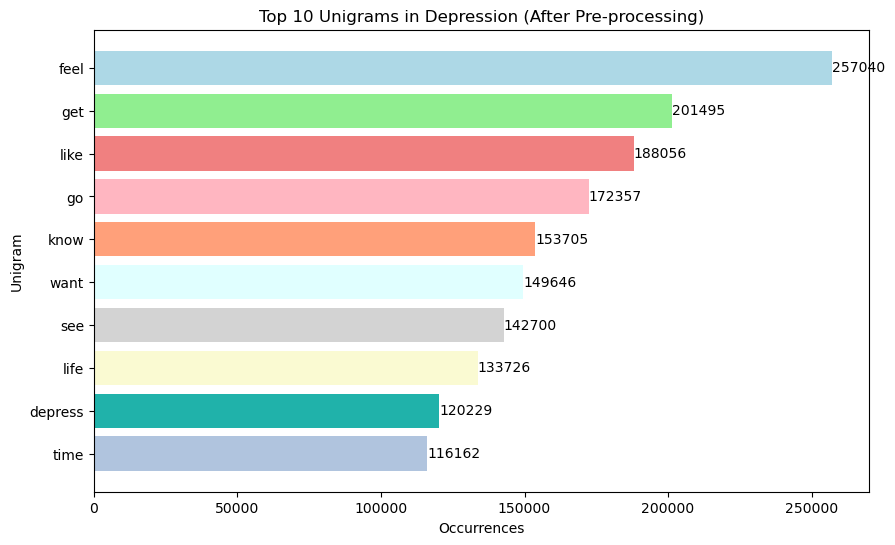

In [76]:
#Unigram (After)
def extract_unigrams(text):
    return text  # No need to split the text if it's already tokenized

# Function to perform unigram analysis on DataFrame
def unigram_analysis(depression_df):
    unigram_counts = Counter()
    for tokens in depression_df['port_stem']:
        unigram_counts.update(tokens)
    
    # Extract the top 10 most common unigrams and their counts
    top_unigrams = unigram_counts.most_common(10)
    return top_unigrams

light_colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightpink', 'lightsalmon', 'lightcyan', 'lightgray', 'lightgoldenrodyellow', 'lightseagreen', 'lightsteelblue']

# Perform unigram analysis on the DataFrame and plot the results
def plot_unigram_analysis(depression_df):
    top_unigrams = unigram_analysis(depression_df)
    unigrams, counts = zip(*top_unigrams)
    
    # Create a bar chart with light colors
    plt.figure(figsize=(10, 6))
    bars = plt.barh(unigrams, counts, color=light_colors)
    plt.xlabel('Occurrences')
    plt.ylabel('Unigram')
    plt.title('Top 10 Unigrams in Depression (After Pre-processing)')
    plt.gca().invert_yaxis()  # Invert y-axis to display highest count at the top
    
    # Add data labels to the bars
    for i, v in enumerate(counts):
        plt.text(v + 0.1, i, str(v), color='black', va='center')  # Add data label next to the bar
    
    plt.show()

# Perform unigram analysis and plot the results
plot_unigram_analysis(depression_df)


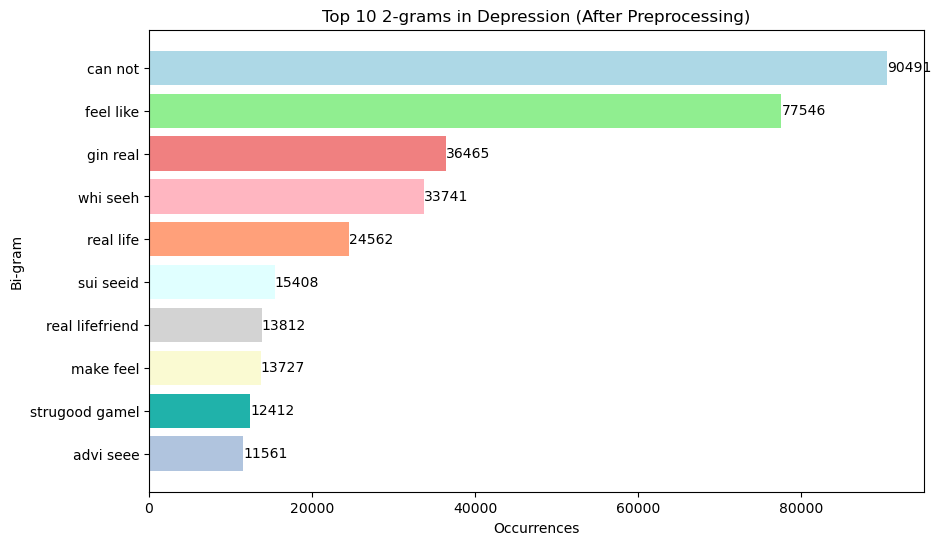

In [ ]:
#Bigram (After)
def extract_bigrams(tokens, n):
    bi_grams = ngrams(tokens, n)
    return [' '.join(gram) for gram in bi_grams]

# Function to perform N-gram analysis on DataFrame
def bigram_analysis(depression_df, n):
    bigram_counts = Counter()
    for tokens in depression_df['port_stem']:
        bigrams_list = extract_bigrams(tokens, n)
        bigram_counts.update(bigrams_list)
    
    # Extract the top N most common N-grams and their counts
    top_bigrams = bigram_counts.most_common(10)
    return top_bigrams

light_colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightpink', 'lightsalmon', 'lightcyan', 'lightgray', 'lightgoldenrodyellow', 'lightseagreen', 'lightsteelblue']
# Perform N-gram analysis on the DataFrame and plot the results
def plot_bigram_analysis(depression_df, n):
    top_bigrams = bigram_analysis(depression_df, n)
    bi_grams, counts = zip(*top_bigrams)
    
    # Create a bar chart
    plt.figure(figsize=(10, 6))
    plt.barh(bi_grams, counts, color=light_colors)
    plt.xlabel('Occurrences')
    plt.ylabel('Bi-gram')
    plt.title(f'Top 10 {n}-grams in Depression (After Preprocessing)')
    plt.gca().invert_yaxis()  # Invert y-axis to display highest count at the top
    
    # Add data labels to the bars
    for i, v in enumerate(counts):
        plt.text(v + 0.1, i, str(v), color='black', va='center')  # Add data label next to the bar
    
    plt.show()

# Perform N-gram analysis and plot the results
n = 2  # Change this to the desired N-gram size
plot_bigram_analysis(depression_df, n)


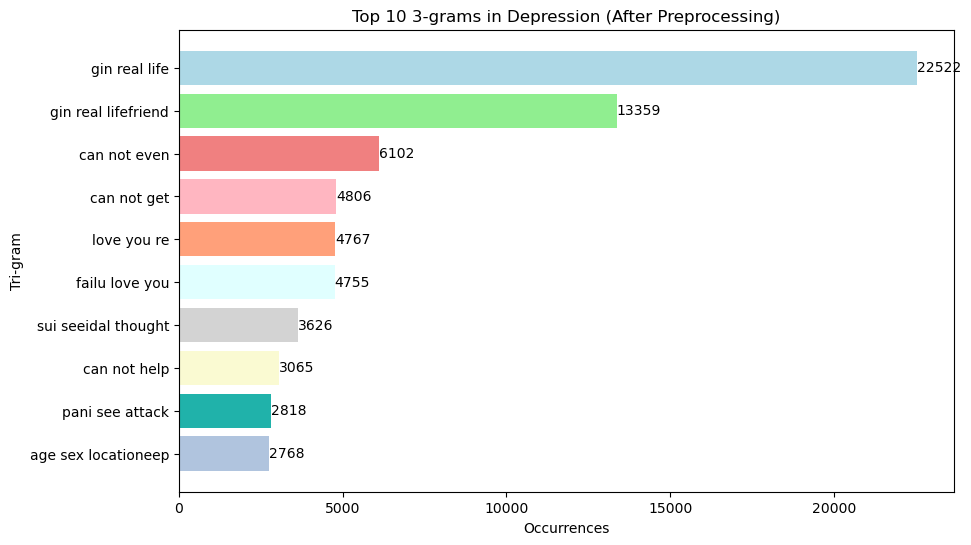

In [ ]:
#Trigram (After)
def extract_trigrams(tokens, n):
    tri_grams = ngrams(tokens, n)
    return [' '.join(gram) for gram in tri_grams]

# Function to perform N-gram analysis on DataFrame
def trigram_analysis(depression_df, n):
    trigram_counts = Counter()
    for tokens in depression_df['port_stem']:
        trigrams_list = extract_trigrams(tokens, n)
        trigram_counts.update(trigrams_list)
    
    # Extract the top N most common N-grams and their counts
    top_trigrams = trigram_counts.most_common(10)
    return top_trigrams

light_colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightpink', 'lightsalmon', 'lightcyan', 'lightgray', 'lightgoldenrodyellow', 'lightseagreen', 'lightsteelblue']
# Perform N-gram analysis on the DataFrame and plot the results
def plot_trigram_analysis(depression_df, n):
    top_trigrams = trigram_analysis(depression_df, n)
    tri_grams, counts = zip(*top_trigrams)
    
    # Create a bar chart
    plt.figure(figsize=(10, 6))
    plt.barh(tri_grams, counts, color=light_colors)
    plt.xlabel('Occurrences')
    plt.ylabel('Tri-gram')
    plt.title(f'Top 10 {n}-grams in Depression (After Preprocessing)')
    plt.gca().invert_yaxis()  # Invert y-axis to display highest count at the top
    
    # Add data labels to the bars
    for i, v in enumerate(counts):
        plt.text(v + 0.1, i, str(v), color='black', va='center')  # Add data label next to the bar
    
    plt.show()

# Perform N-gram analysis and plot the results
n = 3  # Change this to the desired N-gram size
plot_trigram_analysis(depression_df, n)


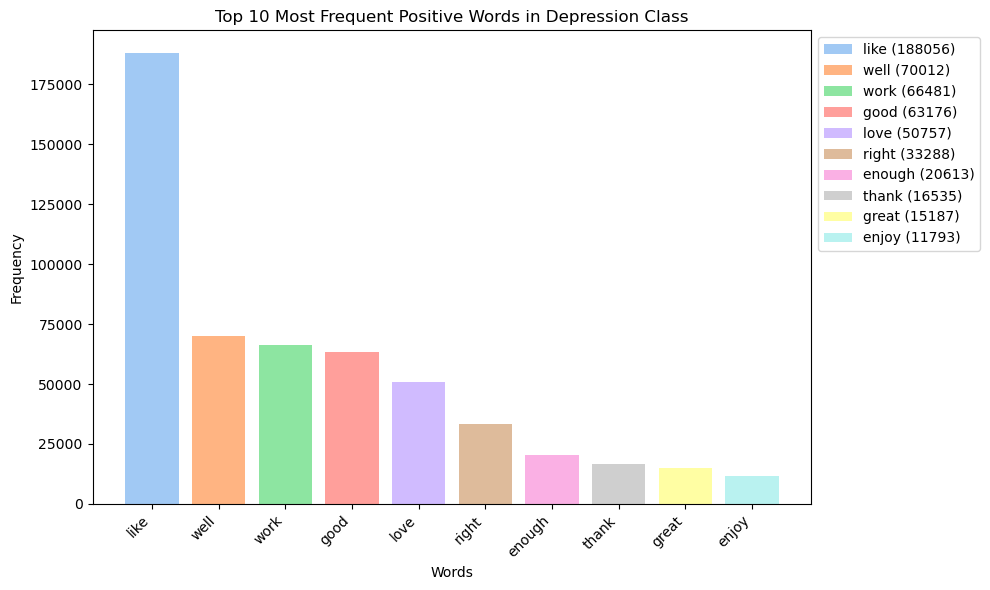

In [ ]:
#Positive Most Frequent Words (Bar Chart)
def filter_by_sentiment(tokens, positive_words):
    words = [word for word in tokens if word in positive_words]
    return words

# Get the positive words from the opinion lexicon
positive_words = set(opinion_lexicon.positive())

# Filter words based on sentiment
sentiment_positive_words = depression_df['port_stem'].apply(lambda x: filter_by_sentiment(x, positive_words))

# Flatten the list of sentiment words
all_sentiment_pos_words = [word for sublist in sentiment_positive_words for word in sublist]

# Count the frequency of sentiment words
pos_word_counts = Counter(all_sentiment_pos_words)

# Get the top 10 most frequent sentiment words
top_sentiment_pos_words = dict(pos_word_counts.most_common(10))

# Choose a color palette from seaborn (you can choose another palette if you prefer)
colors = sns.color_palette('pastel')

# Display the result as a bar plot with different colors for each bar
plt.figure(figsize=(10, 6))
bars = plt.bar(top_sentiment_pos_words.keys(), top_sentiment_pos_words.values(), color=colors)

# Add labels and title
plt.title('Top 10 Most Frequent Positive Words in Depression Class')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')

# Add custom legend for each bar
legend_labels = [f'{word} ({count})' for word, count in top_sentiment_pos_words.items()]
plt.legend(bars, legend_labels, loc='upper left', bbox_to_anchor=(1, 1))

# Show the bar plot
plt.tight_layout()
plt.show()


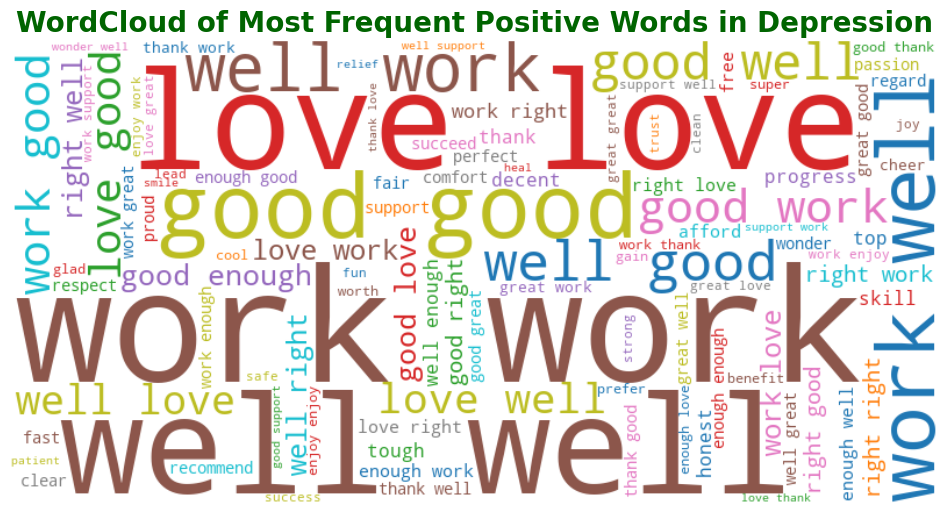

In [ ]:
#Positive Most Frequent Words in Depression (Word Clouds)
wordcloud_text = ' '.join(all_sentiment_pos_words)

# Generate the WordCloud with additional customization
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='tab10',
                      contour_width=2, contour_color='blue', max_words=100).generate(wordcloud_text)

# Display the WordCloud with more visual appeal
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axis
plt.title('WordCloud of Most Frequent Positive Words in Depression', fontsize=20, color='darkgreen', fontweight='bold')
plt.show()

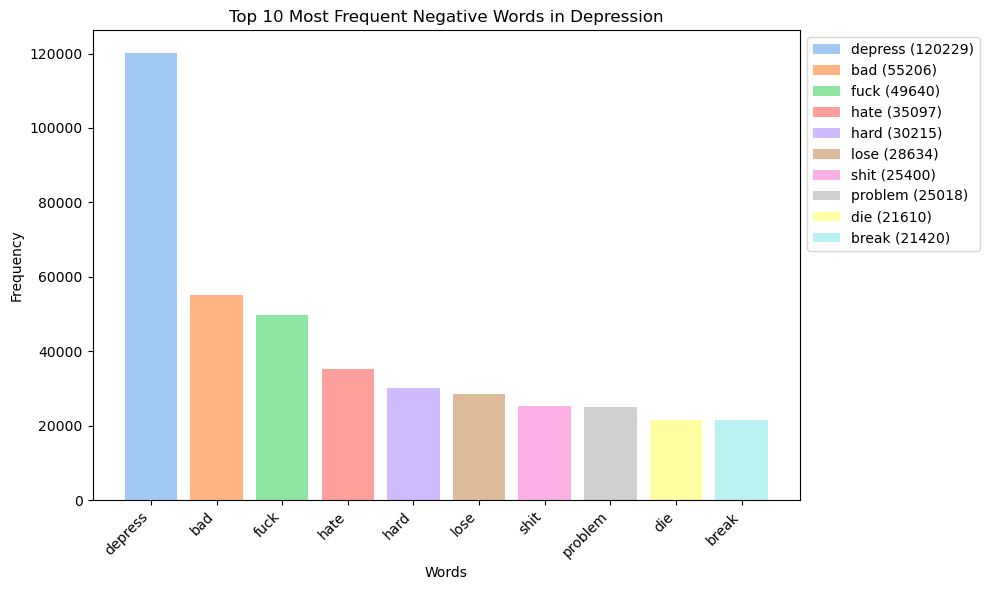

In [ ]:
#Negative Most Frequent Words in Depression (Bar Chart)
def filter_by_sentiment(tokens, negative_words):
    words = [word for word in tokens if word in negative_words]
    return words

negative_words = set(opinion_lexicon.negative())

# Filter words based on sentiment
sentiment_negative_words = depression_df['port_stem'].apply(lambda x: filter_by_sentiment(x, negative_words))

# Flatten the list of sentiment words
all_sentiment_neg_words = [word for sublist in sentiment_negative_words for word in sublist]

# Count the frequency of sentiment words
neg_word_counts = Counter(all_sentiment_neg_words)

# Get the top 10 most frequent sentiment words
top_sentiment_neg_words = dict(neg_word_counts.most_common(10))

# Choose a color palette from seaborn (you can choose another palette if you prefer)
colors = sns.color_palette('pastel')

# Display the result as a bar plot with different colors for each bar
plt.figure(figsize=(10, 6))
bars = plt.bar(top_sentiment_neg_words.keys(), top_sentiment_neg_words.values(), color=colors)

# Add labels and title
plt.title('Top 10 Most Frequent Negative Words in Depression')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')

# Add custom legend for each bar
legend_labels = [f'{word} ({count})' for word, count in top_sentiment_neg_words.items()]
plt.legend(bars, legend_labels, loc='upper left', bbox_to_anchor=(1, 1))

# Show the bar plot
plt.tight_layout()
plt.show()


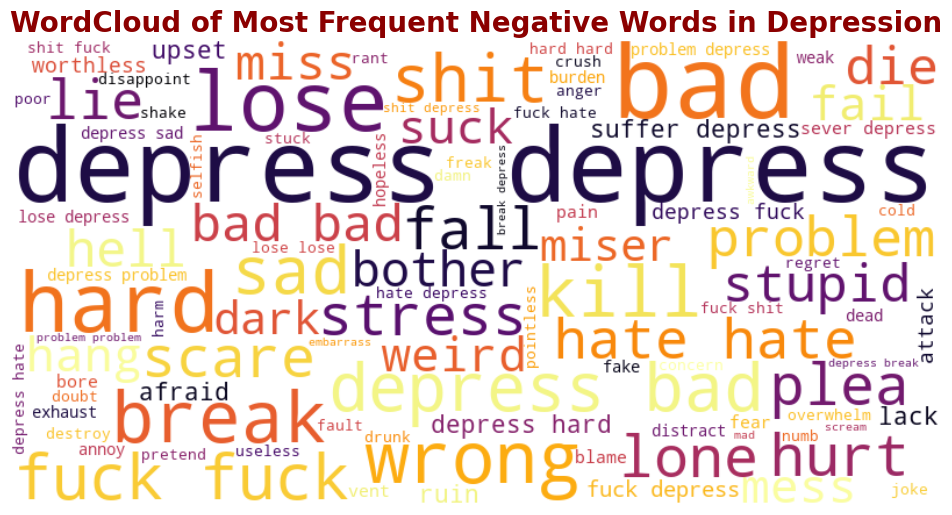

In [ ]:
#Negative Most Frequent Words (Word Clouds)
wordcloud_text = ' '.join(all_sentiment_neg_words)

# Generate the WordCloud with additional customization
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='inferno',
                      contour_width=2, contour_color='red', max_words=100).generate(wordcloud_text)

# Display the WordCloud with more visual appeal
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axis
plt.title('WordCloud of Most Frequent Negative Words in Depression', fontsize=20, color='darkred', fontweight='bold')
plt.show()

# Teenagers df

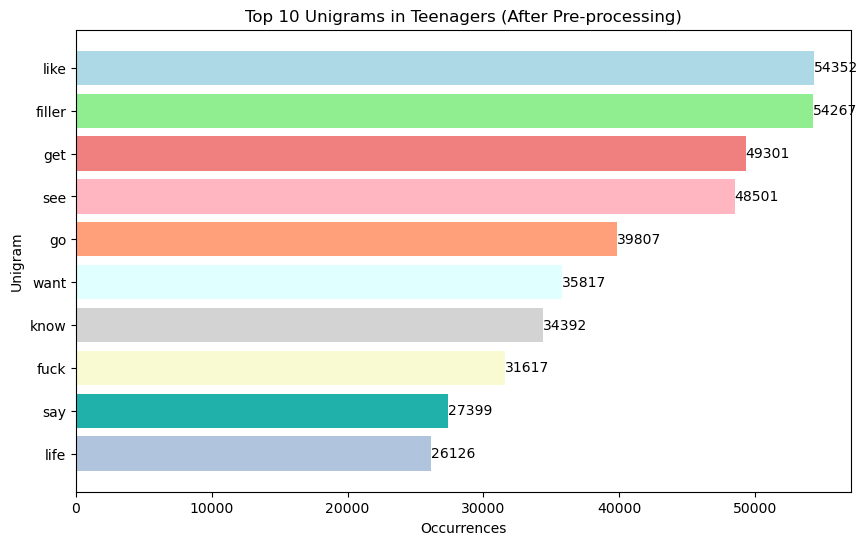

In [ ]:
#Unigram (After)
def extract_unigrams(text):
    return text  # No need to split the text if it's already tokenized

# Function to perform unigram analysis on DataFrame
def unigram_analysis(teenager_df):
    unigram_counts = Counter()
    for tokens in teenager_df['port_stem']:
        unigram_counts.update(tokens)
    
    # Extract the top 10 most common unigrams and their counts
    top_unigrams = unigram_counts.most_common(10)
    return top_unigrams

light_colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightpink', 'lightsalmon', 'lightcyan', 'lightgray', 'lightgoldenrodyellow', 'lightseagreen', 'lightsteelblue']

# Perform unigram analysis on the DataFrame and plot the results
def plot_unigram_analysis(teenager_df):
    top_unigrams = unigram_analysis(teenager_df)
    unigrams, counts = zip(*top_unigrams)
    
    # Create a bar chart with light colors
    plt.figure(figsize=(10, 6))
    bars = plt.barh(unigrams, counts, color=light_colors)
    plt.xlabel('Occurrences')
    plt.ylabel('Unigram')
    plt.title('Top 10 Unigrams in Teenagers (After Pre-processing)')
    plt.gca().invert_yaxis()  # Invert y-axis to display highest count at the top
    
    # Add data labels to the bars
    for i, v in enumerate(counts):
        plt.text(v + 0.1, i, str(v), color='black', va='center')  # Add data label next to the bar
    
    plt.show()

# Perform unigram analysis and plot the results
plot_unigram_analysis(teenager_df)


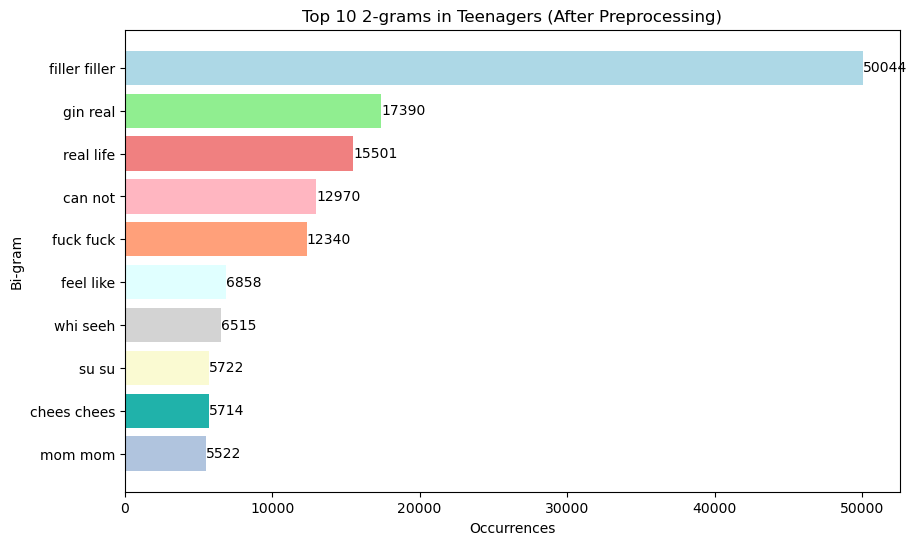

In [ ]:
#Bigram (After)
def extract_bigrams(tokens, n):
    bi_grams = ngrams(tokens, n)
    return [' '.join(gram) for gram in bi_grams]

# Function to perform N-gram analysis on DataFrame
def bigram_analysis(teenager_df, n):
    bigram_counts = Counter()
    for tokens in teenager_df['port_stem']:
        bigrams_list = extract_bigrams(tokens, n)
        bigram_counts.update(bigrams_list)
    
    # Extract the top N most common N-grams and their counts
    top_bigrams = bigram_counts.most_common(10)
    return top_bigrams

light_colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightpink', 'lightsalmon', 'lightcyan', 'lightgray', 'lightgoldenrodyellow', 'lightseagreen', 'lightsteelblue']
# Perform N-gram analysis on the DataFrame and plot the results
def plot_bigram_analysis(teenager_df, n):
    top_bigrams = bigram_analysis(teenager_df, n)
    bi_grams, counts = zip(*top_bigrams)
    
    # Create a bar chart
    plt.figure(figsize=(10, 6))
    plt.barh(bi_grams, counts, color=light_colors)
    plt.xlabel('Occurrences')
    plt.ylabel('Bi-gram')
    plt.title(f'Top 10 {n}-grams in Teenagers (After Preprocessing)')
    plt.gca().invert_yaxis()  # Invert y-axis to display highest count at the top
    
    # Add data labels to the bars
    for i, v in enumerate(counts):
        plt.text(v + 0.1, i, str(v), color='black', va='center')  # Add data label next to the bar
    
    plt.show()

# Perform N-gram analysis and plot the results
n = 2  # Change this to the desired N-gram size
plot_bigram_analysis(teenager_df, n)


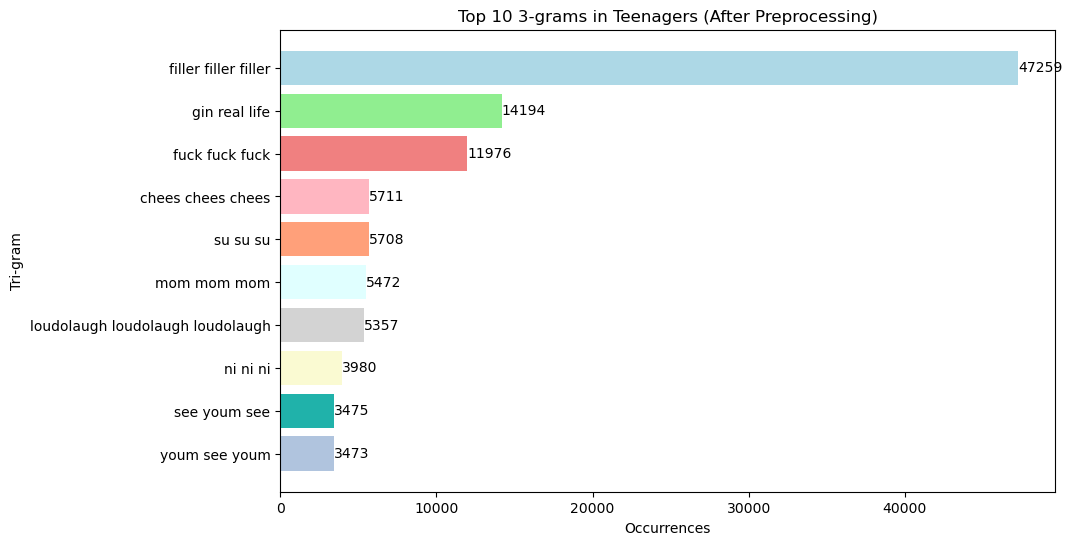

In [ ]:
#Trigram (After)
def extract_trigrams(tokens, n):
    tri_grams = ngrams(tokens, n)
    return [' '.join(gram) for gram in tri_grams]

# Function to perform N-gram analysis on DataFrame
def trigram_analysis(teenager_df, n):
    trigram_counts = Counter()
    for tokens in teenager_df['port_stem']:
        trigrams_list = extract_trigrams(tokens, n)
        trigram_counts.update(trigrams_list)
    
    # Extract the top N most common N-grams and their counts
    top_trigrams = trigram_counts.most_common(10)
    return top_trigrams

light_colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightpink', 'lightsalmon', 'lightcyan', 'lightgray', 'lightgoldenrodyellow', 'lightseagreen', 'lightsteelblue']
# Perform N-gram analysis on the DataFrame and plot the results
def plot_trigram_analysis(teenager_df, n):
    top_trigrams = trigram_analysis(teenager_df, n)
    tri_grams, counts = zip(*top_trigrams)
    
    # Create a bar chart
    plt.figure(figsize=(10, 6))
    plt.barh(tri_grams, counts, color=light_colors)
    plt.xlabel('Occurrences')
    plt.ylabel('Tri-gram')
    plt.title(f'Top 10 {n}-grams in Teenagers (After Preprocessing)')
    plt.gca().invert_yaxis()  # Invert y-axis to display highest count at the top
    
    # Add data labels to the bars
    for i, v in enumerate(counts):
        plt.text(v + 0.1, i, str(v), color='black', va='center')  # Add data label next to the bar
    
    plt.show()

# Perform N-gram analysis and plot the results
n = 3  # Change this to the desired N-gram size
plot_trigram_analysis(teenager_df, n)


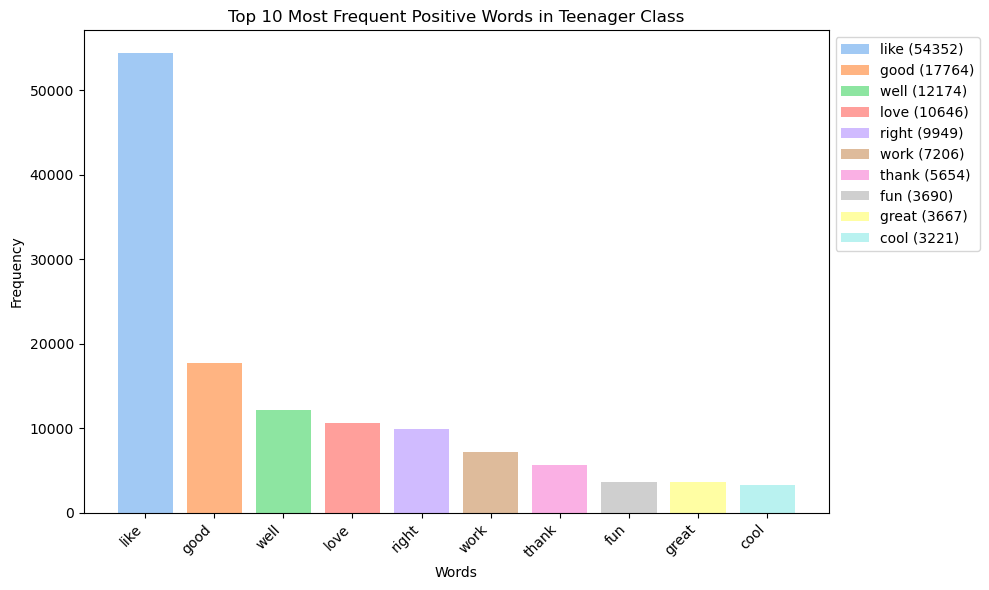

In [ ]:
#Positive Most Frequent Words in Teenagers (Bar Chart)
def filter_by_sentiment(tokens, positive_words):
    words = [word for word in tokens if word in positive_words]
    return words

# Get the positive words from the opinion lexicon
positive_words = set(opinion_lexicon.positive())

# Filter words based on sentiment
sentiment_positive_words = teenager_df['port_stem'].apply(lambda x: filter_by_sentiment(x, positive_words))

# Flatten the list of sentiment words
all_sentiment_pos_words = [word for sublist in sentiment_positive_words for word in sublist]

# Count the frequency of sentiment words
pos_word_counts = Counter(all_sentiment_pos_words)

# Get the top 10 most frequent sentiment words
top_sentiment_pos_words = dict(pos_word_counts.most_common(10))

# Choose a color palette from seaborn (you can choose another palette if you prefer)
colors = sns.color_palette('pastel')

# Display the result as a bar plot with different colors for each bar
plt.figure(figsize=(10, 6))
bars = plt.bar(top_sentiment_pos_words.keys(), top_sentiment_pos_words.values(), color=colors)

# Add labels and title
plt.title('Top 10 Most Frequent Positive Words in Teenager Class')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')

# Add custom legend for each bar
legend_labels = [f'{word} ({count})' for word, count in top_sentiment_pos_words.items()]
plt.legend(bars, legend_labels, loc='upper left', bbox_to_anchor=(1, 1))

# Show the bar plot
plt.tight_layout()
plt.show()


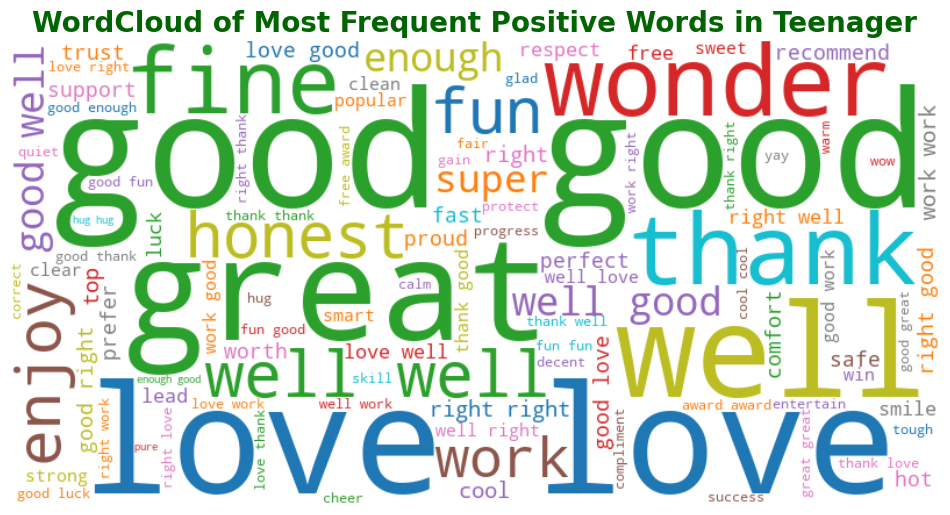

In [ ]:
#Positive (WordCloud)
wordcloud_text = ' '.join(all_sentiment_pos_words)

# Generate the WordCloud with additional customization
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='tab10',
                      contour_width=2, contour_color='blue', max_words=100).generate(wordcloud_text)

# Display the WordCloud with more visual appeal
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axis
plt.title('WordCloud of Most Frequent Positive Words in Teenager', fontsize=20, color='darkgreen', fontweight='bold')
plt.show()


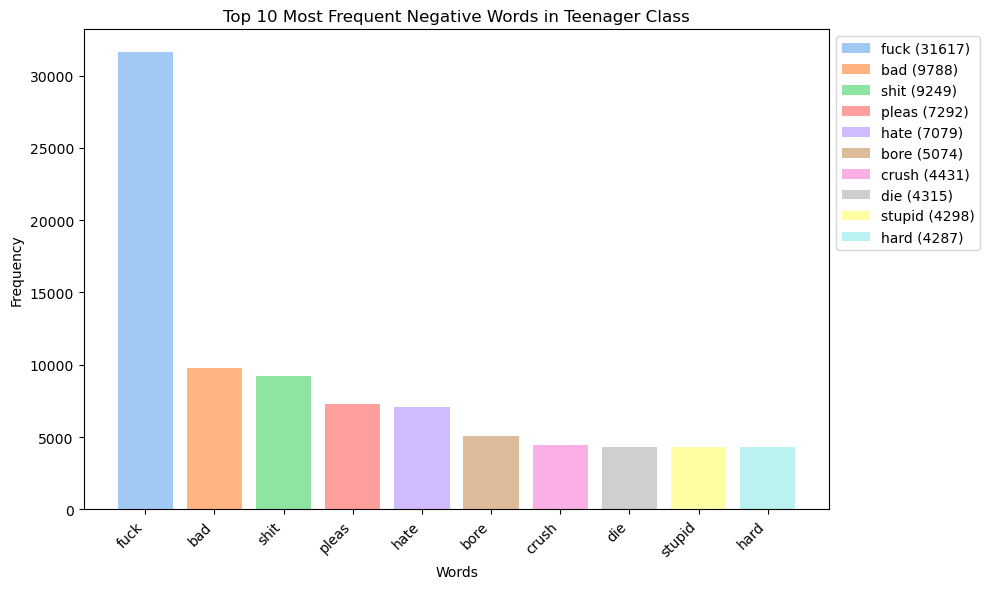

In [ ]:
#3. Negative (Barchart)
def filter_by_sentiment(tokens, negative_words):
    words = [word for word in tokens if word in negative_words]
    return words

negative_words = set(opinion_lexicon.negative())

# Filter words based on sentiment
sentiment_negative_words = teenager_df['port_stem'].apply(lambda x: filter_by_sentiment(x, negative_words))

# Flatten the list of sentiment words
all_sentiment_neg_words = [word for sublist in sentiment_negative_words for word in sublist]

# Count the frequency of sentiment words
neg_word_counts = Counter(all_sentiment_neg_words)

# Get the top 10 most frequent sentiment words
top_sentiment_neg_words = dict(neg_word_counts.most_common(10))

# Choose a color palette from seaborn (you can choose another palette if you prefer)
colors = sns.color_palette('pastel')

# Display the result as a bar plot with different colors for each bar
plt.figure(figsize=(10, 6))
bars = plt.bar(top_sentiment_neg_words.keys(), top_sentiment_neg_words.values(), color=colors)

# Add labels and title
plt.title('Top 10 Most Frequent Negative Words in Teenager Class')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')

# Add custom legend for each bar
legend_labels = [f'{word} ({count})' for word, count in top_sentiment_neg_words.items()]
plt.legend(bars, legend_labels, loc='upper left', bbox_to_anchor=(1, 1))

# Show the bar plot
plt.tight_layout()
plt.show()



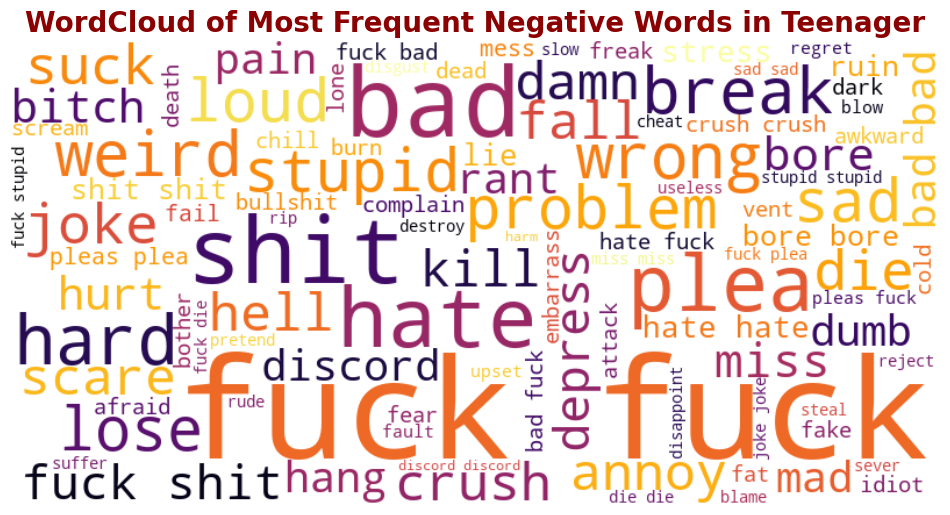

In [ ]:
#Negative (WordCloud)
wordcloud_text = ' '.join(all_sentiment_neg_words)

# Generate the WordCloud with additional customization
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='inferno',
                      contour_width=2, contour_color='red', max_words=100).generate(wordcloud_text)

# Display the WordCloud with more visual appeal
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axis
plt.title('WordCloud of Most Frequent Negative Words in Teenager', fontsize=20, color='darkred', fontweight='bold')
plt.show()


# Neutral - use df

In [ ]:
#4. Neutral (Treemap) 
# Function to filter words based on sentiment
def filter_by_sentiment(tokens, positive_words, negative_words):
    words = [word for word in tokens if word not in positive_words and word not in negative_words]
    return words

# Get the set of positive and negative words from the opinion lexicon
positive_words = set(opinion_lexicon.positive())
negative_words = set(opinion_lexicon.negative())

# Filter words based on sentiment
sentiment_neutral_words = df['port_stem'].apply(lambda x: filter_by_sentiment(x, positive_words, negative_words))

# Flatten the list of sentiment words
all_sentiment_neutral_words = [word for sublist in sentiment_neutral_words for word in sublist]

# Count the frequency of sentiment words
neutral_word_counts = Counter(all_sentiment_neutral_words)

# Get the top 10 most frequent neutral words
top_sentiment_neutral_words = dict(neutral_word_counts.most_common(10))

# Convert word counts to proportions
total_count = sum(top_sentiment_neutral_words.values())
sizes = [count / total_count for count in top_sentiment_neutral_words.values()]

# Create labels for treemap rectangles
labels = [f'{word}\n({count})' for word, count in top_sentiment_neutral_words.items()]

# Create DataFrame for treemap
data = {
    'label': labels,
    'size': sizes
}
df_treemap = pd.DataFrame(data)

# Create treemap figure
fig = px.treemap(df_treemap, path=['label'], values='size', color='size', color_continuous_scale='Viridis')

# Update treemap layout
fig.update_layout(title='Top 10 Most Frequent Neutral Words in Depression & Teenager')

# Show the treemap
fig.show()


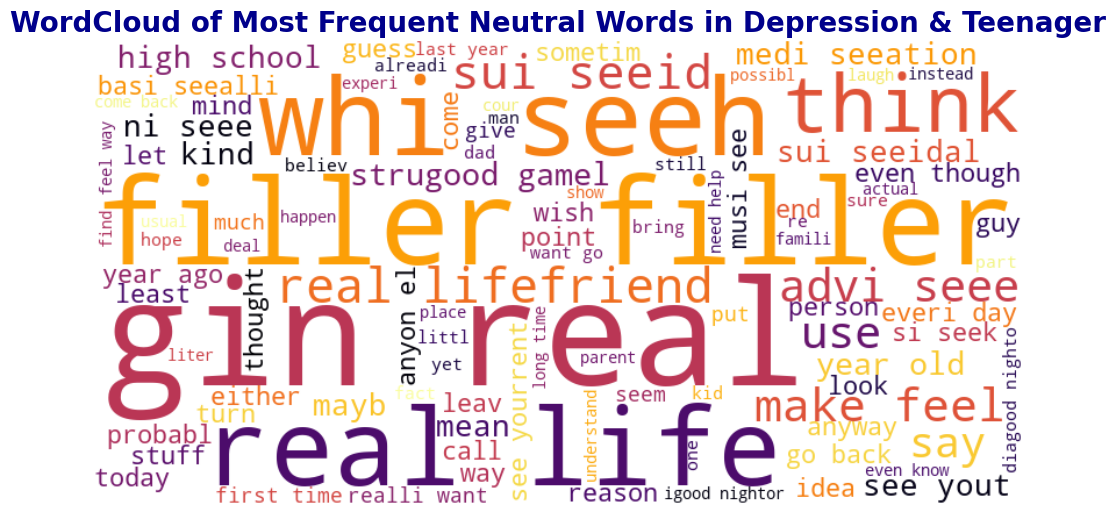

In [ ]:
#Neutral (WordCloud)
wordcloud_text = ' '.join(all_sentiment_neutral_words)

# Generate the WordCloud with additional customization
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='inferno',
                      contour_width=2, contour_color='blue', max_words=100).generate(wordcloud_text)

# Display the WordCloud with more visual appeal
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axis
plt.title('WordCloud of Most Frequent Neutral Words in Depression & Teenager', fontsize=20, color='darkblue', fontweight='bold')
plt.show()


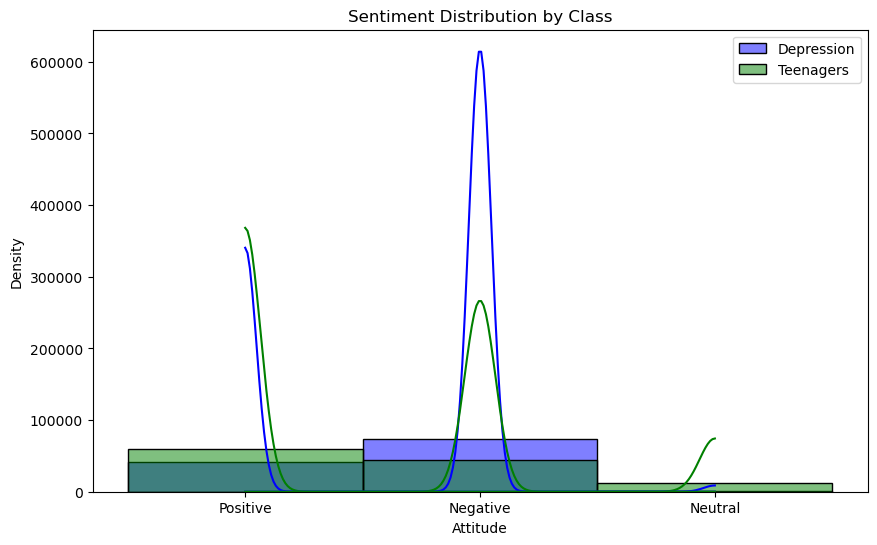

In [ ]:
#Calculate Sentiment Distribution
depression_sent_distribution = depression_df['sentiment_label'].value_counts(normalize=True)
teenager_sent_distribution = teenager_df['sentiment_label'].value_counts(normalize=True)
plt.figure(figsize=(10, 6))

# Plotting histogram for depression class
sns.histplot(depression_df['sentiment_label'], bins=5, kde=True, color='blue', alpha=0.5, label='Depression')

# Plotting histogram for normal class
sns.histplot(teenager_df['sentiment_label'], bins=5, kde=True, color='green', alpha=0.5, label='Teenagers')

# Plotting line graph for depression class
sns.lineplot(x=depression_sent_distribution.index, y=depression_sent_distribution.values, color='blue')

# Plotting line graph for normal class
sns.lineplot(x=teenager_sent_distribution.index, y=teenager_sent_distribution.values, color='green')

plt.title('Sentiment Distribution by Class')
plt.xlabel('Attitude')
plt.ylabel('Density')
plt.legend()
plt.show()

# Save Data Frame After Preprocessing

In [ ]:
df.to_csv('/Users/huiyee/Downloads/Study/Year3Sem1/FYP/preprocessing2.csv', index=False)
 